In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1,y2

In [3]:
def norm(x):
    return(x - train_stats['mean']) / train_stats['std']

In [4]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true,y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100,100], [-100,100])
    plt.show()

In [5]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name], color = 'blue', label = metric_name)
    plt.plot(history.history['val_' + metric_name], color = 'green', label = 'val_' + metric_name)
    plt.show()

In [6]:
#reading the data
df = pd.read_excel('C:/Users/Teja/Desktop/dsml/adv_tensorflow/ENB2012_data.xlsx')
df = df.sample(frac = 1).reset_index(drop = True)

In [7]:
#split the data into train and test with 80 and train / 20 test 
train, test = train_test_split(df, test_size = 0.2)
train_stats = train.describe()

In [8]:
#get y1 and y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

In [9]:
#normalize the training and test  data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [10]:
#define model layers.
input_layer = Input(shape = (len(train.columns),))
first_dense = Dense(units = '128', activation = 'relu')(input_layer)
second_dense = Dense(units = '128', activation = 'relu')(first_dense)

In [11]:
#y1 will fed directly from the second dense
y1_output = Dense(units = '1', name = 'y1_output')(second_dense)
third_dense = Dense(units = '64', activation = 'relu')(second_dense)

In [12]:
#Y2 output will come via third dense
y2_output = Dense(units = '1', name = 'y2_output')(third_dense)

In [13]:
#define the model layer with the input layer and a list of output layers
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
_______________________________________________________________________________________

In [14]:
#specify the optimizer and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr = 0.001)
model.compile(optimizer = optimizer,
             loss = {'y1_output':'mse', 'y2_output' : 'mse'},
             metrics = {'y1_output' : tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output' : tf.keras.metrics.RootMeanSquaredError()})

In [15]:
from tensorflow.keras.layers import Layer
model._layers = [
    layer for layer in model.layers if isinstance(layer, Layer)
]
plot_model(model)

plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [16]:
#train the model for 2000 epopchs 
history = model.fit(norm_train_X, train_Y,
                   epochs = 2000, batch_size = 10, validation_data = (norm_test_X, test_Y))

Epoch 1/2000
62/62 [==============================] - 1s 11ms/step - loss: 222.4570 - y1_output_loss: 109.3265 - y2_output_loss: 113.1305 - y1_output_root_mean_squared_error: 10.4559 - y2_output_root_mean_squared_error: 10.6363 - val_loss: 40.0991 - val_y1_output_loss: 19.2017 - val_y2_output_loss: 20.8974 - val_y1_output_root_mean_squared_error: 4.3820 - val_y2_output_root_mean_squared_error: 4.5714
Epoch 2/2000
62/62 [==============================] - 0s 3ms/step - loss: 31.5079 - y1_output_loss: 12.3507 - y2_output_loss: 19.1573 - y1_output_root_mean_squared_error: 3.5143 - y2_output_root_mean_squared_error: 4.3769 - val_loss: 91.3111 - val_y1_output_loss: 20.1104 - val_y2_output_loss: 71.2007 - val_y1_output_root_mean_squared_error: 4.4845 - val_y2_output_root_mean_squared_error: 8.4381
Epoch 3/2000
62/62 [==============================] - 0s 4ms/step - loss: 25.4469 - y1_output_loss: 9.8547 - y2_output_loss: 15.5922 - y1_output_root_mean_squared_error: 3.1392 - y2_output_root_mean

62/62 [==============================] - 0s 3ms/step - loss: 18.9884 - y1_output_loss: 6.2842 - y2_output_loss: 12.7042 - y1_output_root_mean_squared_error: 2.5068 - y2_output_root_mean_squared_error: 3.5643 - val_loss: 32.1860 - val_y1_output_loss: 10.3543 - val_y2_output_loss: 21.8318 - val_y1_output_root_mean_squared_error: 3.2178 - val_y2_output_root_mean_squared_error: 4.6724
Epoch 22/2000
62/62 [==============================] - 0s 3ms/step - loss: 13.1921 - y1_output_loss: 4.9923 - y2_output_loss: 8.1997 - y1_output_root_mean_squared_error: 2.2344 - y2_output_root_mean_squared_error: 2.8635 - val_loss: 18.9136 - val_y1_output_loss: 7.6359 - val_y2_output_loss: 11.2777 - val_y1_output_root_mean_squared_error: 2.7633 - val_y2_output_root_mean_squared_error: 3.3582
Epoch 23/2000
62/62 [==============================] - 0s 3ms/step - loss: 13.2604 - y1_output_loss: 4.9144 - y2_output_loss: 8.3460 - y1_output_root_mean_squared_error: 2.2168 - y2_output_root_mean_squared_error: 2.8889

Epoch 42/2000
62/62 [==============================] - 0s 3ms/step - loss: 8.7954 - y1_output_loss: 2.7225 - y2_output_loss: 6.0729 - y1_output_root_mean_squared_error: 1.6500 - y2_output_root_mean_squared_error: 2.4643 - val_loss: 7.6643 - val_y1_output_loss: 3.0775 - val_y2_output_loss: 4.5868 - val_y1_output_root_mean_squared_error: 1.7543 - val_y2_output_root_mean_squared_error: 2.1417
Epoch 43/2000
62/62 [==============================] - 0s 3ms/step - loss: 9.2315 - y1_output_loss: 2.9056 - y2_output_loss: 6.3259 - y1_output_root_mean_squared_error: 1.7046 - y2_output_root_mean_squared_error: 2.5151 - val_loss: 23.8908 - val_y1_output_loss: 7.1155 - val_y2_output_loss: 16.7753 - val_y1_output_root_mean_squared_error: 2.6675 - val_y2_output_root_mean_squared_error: 4.0958
Epoch 44/2000
62/62 [==============================] - ETA: 0s - loss: 9.5846 - y1_output_loss: 2.7987 - y2_output_loss: 6.7859 - y1_output_root_mean_squared_error: 1.6729 - y2_output_root_mean_squared_error: 2.6

62/62 [==============================] - 0s 3ms/step - loss: 6.2268 - y1_output_loss: 1.8832 - y2_output_loss: 4.3437 - y1_output_root_mean_squared_error: 1.3723 - y2_output_root_mean_squared_error: 2.0841 - val_loss: 5.0023 - val_y1_output_loss: 1.7477 - val_y2_output_loss: 3.2545 - val_y1_output_root_mean_squared_error: 1.3220 - val_y2_output_root_mean_squared_error: 1.8040
Epoch 63/2000
62/62 [==============================] - 0s 3ms/step - loss: 6.6483 - y1_output_loss: 2.0368 - y2_output_loss: 4.6116 - y1_output_root_mean_squared_error: 1.4272 - y2_output_root_mean_squared_error: 2.1475 - val_loss: 20.8247 - val_y1_output_loss: 4.0599 - val_y2_output_loss: 16.7648 - val_y1_output_root_mean_squared_error: 2.0149 - val_y2_output_root_mean_squared_error: 4.0945
Epoch 64/2000
62/62 [==============================] - 0s 4ms/step - loss: 6.8955 - y1_output_loss: 2.0829 - y2_output_loss: 4.8126 - y1_output_root_mean_squared_error: 1.4432 - y2_output_root_mean_squared_error: 2.1938 - val_

62/62 [==============================] - 0s 4ms/step - loss: 4.1854 - y1_output_loss: 1.1784 - y2_output_loss: 3.0070 - y1_output_root_mean_squared_error: 1.0856 - y2_output_root_mean_squared_error: 1.7341 - val_loss: 3.1388 - val_y1_output_loss: 0.8506 - val_y2_output_loss: 2.2882 - val_y1_output_root_mean_squared_error: 0.9223 - val_y2_output_root_mean_squared_error: 1.5127
Epoch 83/2000
62/62 [==============================] - 0s 3ms/step - loss: 4.2011 - y1_output_loss: 1.0056 - y2_output_loss: 3.1956 - y1_output_root_mean_squared_error: 1.0028 - y2_output_root_mean_squared_error: 1.7876 - val_loss: 17.1098 - val_y1_output_loss: 6.9388 - val_y2_output_loss: 10.1711 - val_y1_output_root_mean_squared_error: 2.6342 - val_y2_output_root_mean_squared_error: 3.1892
Epoch 84/2000
62/62 [==============================] - 0s 3ms/step - loss: 4.1296 - y1_output_loss: 1.1394 - y2_output_loss: 2.9902 - y1_output_root_mean_squared_error: 1.0674 - y2_output_root_mean_squared_error: 1.7292 - val_

Epoch 103/2000
62/62 [==============================] - 0s 3ms/step - loss: 2.1381 - y1_output_loss: 0.4930 - y2_output_loss: 1.6451 - y1_output_root_mean_squared_error: 0.7021 - y2_output_root_mean_squared_error: 1.2826 - val_loss: 2.9948 - val_y1_output_loss: 0.6026 - val_y2_output_loss: 2.3922 - val_y1_output_root_mean_squared_error: 0.7763 - val_y2_output_root_mean_squared_error: 1.5467
Epoch 104/2000
62/62 [==============================] - 0s 3ms/step - loss: 2.6531 - y1_output_loss: 0.6140 - y2_output_loss: 2.0392 - y1_output_root_mean_squared_error: 0.7836 - y2_output_root_mean_squared_error: 1.4280 - val_loss: 2.6026 - val_y1_output_loss: 0.6422 - val_y2_output_loss: 1.9604 - val_y1_output_root_mean_squared_error: 0.8014 - val_y2_output_root_mean_squared_error: 1.4001
Epoch 105/2000
62/62 [==============================] - 0s 3ms/step - loss: 2.9594 - y1_output_loss: 0.7068 - y2_output_loss: 2.2526 - y1_output_root_mean_squared_error: 0.8407 - y2_output_root_mean_squared_error

Epoch 124/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.6053 - y1_output_loss: 0.3771 - y2_output_loss: 1.2282 - y1_output_root_mean_squared_error: 0.6141 - y2_output_root_mean_squared_error: 1.1082 - val_loss: 12.8841 - val_y1_output_loss: 1.5136 - val_y2_output_loss: 11.3704 - val_y1_output_root_mean_squared_error: 1.2303 - val_y2_output_root_mean_squared_error: 3.3720
Epoch 125/2000
62/62 [==============================] - 0s 3ms/step - loss: 2.0593 - y1_output_loss: 0.4711 - y2_output_loss: 1.5882 - y1_output_root_mean_squared_error: 0.6864 - y2_output_root_mean_squared_error: 1.2602 - val_loss: 2.6615 - val_y1_output_loss: 0.6708 - val_y2_output_loss: 1.9908 - val_y1_output_root_mean_squared_error: 0.8190 - val_y2_output_root_mean_squared_error: 1.4109
Epoch 126/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.9217 - y1_output_loss: 0.4613 - y2_output_loss: 1.4604 - y1_output_root_mean_squared_error: 0.6792 - y2_output_root_mean_squared_err

Epoch 145/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.4640 - y1_output_loss: 0.3540 - y2_output_loss: 1.1100 - y1_output_root_mean_squared_error: 0.5949 - y2_output_root_mean_squared_error: 1.0536 - val_loss: 2.3774 - val_y1_output_loss: 0.5854 - val_y2_output_loss: 1.7919 - val_y1_output_root_mean_squared_error: 0.7651 - val_y2_output_root_mean_squared_error: 1.3386
Epoch 146/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.7981 - y1_output_loss: 0.3772 - y2_output_loss: 1.4209 - y1_output_root_mean_squared_error: 0.6142 - y2_output_root_mean_squared_error: 1.1920 - val_loss: 3.1422 - val_y1_output_loss: 0.9481 - val_y2_output_loss: 2.1942 - val_y1_output_root_mean_squared_error: 0.9737 - val_y2_output_root_mean_squared_error: 1.4813
Epoch 147/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.5821 - y1_output_loss: 0.3350 - y2_output_loss: 1.2471 - y1_output_root_mean_squared_error: 0.5788 - y2_output_root_mean_squared_error

Epoch 166/2000
62/62 [==============================] - 0s 4ms/step - loss: 2.4142 - y1_output_loss: 0.5619 - y2_output_loss: 1.8524 - y1_output_root_mean_squared_error: 0.7496 - y2_output_root_mean_squared_error: 1.3610 - val_loss: 1.9774 - val_y1_output_loss: 0.4435 - val_y2_output_loss: 1.5339 - val_y1_output_root_mean_squared_error: 0.6659 - val_y2_output_root_mean_squared_error: 1.2385
Epoch 167/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.3424 - y1_output_loss: 0.2701 - y2_output_loss: 1.0723 - y1_output_root_mean_squared_error: 0.5197 - y2_output_root_mean_squared_error: 1.0355 - val_loss: 1.8047 - val_y1_output_loss: 0.3780 - val_y2_output_loss: 1.4267 - val_y1_output_root_mean_squared_error: 0.6148 - val_y2_output_root_mean_squared_error: 1.1944
Epoch 168/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.2626 - y1_output_loss: 0.2981 - y2_output_loss: 0.9645 - y1_output_root_mean_squared_error: 0.5460 - y2_output_root_mean_squared_error

Epoch 187/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.1774 - y1_output_loss: 0.2733 - y2_output_loss: 0.9041 - y1_output_root_mean_squared_error: 0.5228 - y2_output_root_mean_squared_error: 0.9508 - val_loss: 1.6438 - val_y1_output_loss: 0.3137 - val_y2_output_loss: 1.3301 - val_y1_output_root_mean_squared_error: 0.5601 - val_y2_output_root_mean_squared_error: 1.1533
Epoch 188/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.0879 - y1_output_loss: 0.2397 - y2_output_loss: 0.8482 - y1_output_root_mean_squared_error: 0.4896 - y2_output_root_mean_squared_error: 0.9210 - val_loss: 1.5743 - val_y1_output_loss: 0.3187 - val_y2_output_loss: 1.2556 - val_y1_output_root_mean_squared_error: 0.5646 - val_y2_output_root_mean_squared_error: 1.1205
Epoch 189/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.0877 - y1_output_loss: 0.2159 - y2_output_loss: 0.8718 - y1_output_root_mean_squared_error: 0.4646 - y2_output_root_mean_squared_error

Epoch 208/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.0705 - y1_output_loss: 0.2260 - y2_output_loss: 0.8444 - y1_output_root_mean_squared_error: 0.4754 - y2_output_root_mean_squared_error: 0.9189 - val_loss: 24.1710 - val_y1_output_loss: 8.3561 - val_y2_output_loss: 15.8149 - val_y1_output_root_mean_squared_error: 2.8907 - val_y2_output_root_mean_squared_error: 3.9768
Epoch 209/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.7638 - y1_output_loss: 0.4414 - y2_output_loss: 1.3224 - y1_output_root_mean_squared_error: 0.6644 - y2_output_root_mean_squared_error: 1.1499 - val_loss: 2.1421 - val_y1_output_loss: 0.4355 - val_y2_output_loss: 1.7067 - val_y1_output_root_mean_squared_error: 0.6599 - val_y2_output_root_mean_squared_error: 1.3064
Epoch 210/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.9293 - y1_output_loss: 0.2147 - y2_output_loss: 0.7146 - y1_output_root_mean_squared_error: 0.4633 - y2_output_root_mean_squared_err

Epoch 229/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.0034 - y1_output_loss: 0.2030 - y2_output_loss: 0.8003 - y1_output_root_mean_squared_error: 0.4506 - y2_output_root_mean_squared_error: 0.8946 - val_loss: 1.6442 - val_y1_output_loss: 0.3714 - val_y2_output_loss: 1.2728 - val_y1_output_root_mean_squared_error: 0.6094 - val_y2_output_root_mean_squared_error: 1.1282
Epoch 230/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.0001 - y1_output_loss: 0.2099 - y2_output_loss: 0.7902 - y1_output_root_mean_squared_error: 0.4582 - y2_output_root_mean_squared_error: 0.8889 - val_loss: 2.7516 - val_y1_output_loss: 0.4995 - val_y2_output_loss: 2.2521 - val_y1_output_root_mean_squared_error: 0.7068 - val_y2_output_root_mean_squared_error: 1.5007
Epoch 231/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.0281 - y1_output_loss: 0.2122 - y2_output_loss: 0.8159 - y1_output_root_mean_squared_error: 0.4607 - y2_output_root_mean_squared_error

Epoch 250/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.8298 - y1_output_loss: 0.1710 - y2_output_loss: 0.6588 - y1_output_root_mean_squared_error: 0.4135 - y2_output_root_mean_squared_error: 0.8117 - val_loss: 1.5052 - val_y1_output_loss: 0.3062 - val_y2_output_loss: 1.1991 - val_y1_output_root_mean_squared_error: 0.5533 - val_y2_output_root_mean_squared_error: 1.0950
Epoch 251/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.9521 - y1_output_loss: 0.2017 - y2_output_loss: 0.7504 - y1_output_root_mean_squared_error: 0.4491 - y2_output_root_mean_squared_error: 0.8663 - val_loss: 1.4466 - val_y1_output_loss: 0.2674 - val_y2_output_loss: 1.1793 - val_y1_output_root_mean_squared_error: 0.5171 - val_y2_output_root_mean_squared_error: 1.0859
Epoch 252/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.9167 - y1_output_loss: 0.1894 - y2_output_loss: 0.7273 - y1_output_root_mean_squared_error: 0.4352 - y2_output_root_mean_squared_error

Epoch 271/2000
62/62 [==============================] - 0s 5ms/step - loss: 1.2161 - y1_output_loss: 0.2682 - y2_output_loss: 0.9479 - y1_output_root_mean_squared_error: 0.5179 - y2_output_root_mean_squared_error: 0.9736 - val_loss: 2.4015 - val_y1_output_loss: 0.3497 - val_y2_output_loss: 2.0519 - val_y1_output_root_mean_squared_error: 0.5913 - val_y2_output_root_mean_squared_error: 1.4324
Epoch 272/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.8700 - y1_output_loss: 0.1727 - y2_output_loss: 0.6974 - y1_output_root_mean_squared_error: 0.4155 - y2_output_root_mean_squared_error: 0.8351 - val_loss: 1.1460 - val_y1_output_loss: 0.2769 - val_y2_output_loss: 0.8691 - val_y1_output_root_mean_squared_error: 0.5262 - val_y2_output_root_mean_squared_error: 0.9323
Epoch 273/2000
62/62 [==============================] - 0s 4ms/step - loss: 1.0007 - y1_output_loss: 0.2039 - y2_output_loss: 0.7968 - y1_output_root_mean_squared_error: 0.4515 - y2_output_root_mean_squared_error

62/62 [==============================] - 0s 4ms/step - loss: 0.8699 - y1_output_loss: 0.1777 - y2_output_loss: 0.6921 - y1_output_root_mean_squared_error: 0.4216 - y2_output_root_mean_squared_error: 0.8319 - val_loss: 1.1978 - val_y1_output_loss: 0.2972 - val_y2_output_loss: 0.9006 - val_y1_output_root_mean_squared_error: 0.5452 - val_y2_output_root_mean_squared_error: 0.9490
Epoch 292/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7074 - y1_output_loss: 0.1646 - y2_output_loss: 0.5428 - y1_output_root_mean_squared_error: 0.4057 - y2_output_root_mean_squared_error: 0.7368 - val_loss: 1.7989 - val_y1_output_loss: 0.2669 - val_y2_output_loss: 1.5319 - val_y1_output_root_mean_squared_error: 0.5166 - val_y2_output_root_mean_squared_error: 1.2377
Epoch 293/2000
62/62 [==============================] - 0s 5ms/step - loss: 0.6294 - y1_output_loss: 0.1525 - y2_output_loss: 0.4769 - y1_output_root_mean_squared_error: 0.3906 - y2_output_root_mean_squared_error: 0.6906 - val_

Epoch 312/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.8167 - y1_output_loss: 0.1956 - y2_output_loss: 0.6212 - y1_output_root_mean_squared_error: 0.4422 - y2_output_root_mean_squared_error: 0.7881 - val_loss: 1.0652 - val_y1_output_loss: 0.2862 - val_y2_output_loss: 0.7790 - val_y1_output_root_mean_squared_error: 0.5350 - val_y2_output_root_mean_squared_error: 0.8826
Epoch 313/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6764 - y1_output_loss: 0.1580 - y2_output_loss: 0.5184 - y1_output_root_mean_squared_error: 0.3975 - y2_output_root_mean_squared_error: 0.7200 - val_loss: 1.0836 - val_y1_output_loss: 0.2635 - val_y2_output_loss: 0.8200 - val_y1_output_root_mean_squared_error: 0.5133 - val_y2_output_root_mean_squared_error: 0.9056
Epoch 314/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.6878 - y1_output_loss: 0.1475 - y2_output_loss: 0.5403 - y1_output_root_mean_squared_error: 0.3841 - y2_output_root_mean_squared_error

Epoch 333/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5647 - y1_output_loss: 0.1429 - y2_output_loss: 0.4218 - y1_output_root_mean_squared_error: 0.3780 - y2_output_root_mean_squared_error: 0.6494 - val_loss: 1.0274 - val_y1_output_loss: 0.2418 - val_y2_output_loss: 0.7856 - val_y1_output_root_mean_squared_error: 0.4917 - val_y2_output_root_mean_squared_error: 0.8864
Epoch 334/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5913 - y1_output_loss: 0.1479 - y2_output_loss: 0.4433 - y1_output_root_mean_squared_error: 0.3846 - y2_output_root_mean_squared_error: 0.6658 - val_loss: 3.0996 - val_y1_output_loss: 1.2992 - val_y2_output_loss: 1.8004 - val_y1_output_root_mean_squared_error: 1.1398 - val_y2_output_root_mean_squared_error: 1.3418
Epoch 335/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.8917 - y1_output_loss: 0.2301 - y2_output_loss: 0.6615 - y1_output_root_mean_squared_error: 0.4797 - y2_output_root_mean_squared_error

Epoch 354/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5442 - y1_output_loss: 0.1419 - y2_output_loss: 0.4023 - y1_output_root_mean_squared_error: 0.3767 - y2_output_root_mean_squared_error: 0.6342 - val_loss: 0.9856 - val_y1_output_loss: 0.2688 - val_y2_output_loss: 0.7168 - val_y1_output_root_mean_squared_error: 0.5184 - val_y2_output_root_mean_squared_error: 0.8467
Epoch 355/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7540 - y1_output_loss: 0.1877 - y2_output_loss: 0.5664 - y1_output_root_mean_squared_error: 0.4332 - y2_output_root_mean_squared_error: 0.7526 - val_loss: 1.0412 - val_y1_output_loss: 0.2948 - val_y2_output_loss: 0.7464 - val_y1_output_root_mean_squared_error: 0.5429 - val_y2_output_root_mean_squared_error: 0.8639
Epoch 356/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5833 - y1_output_loss: 0.1406 - y2_output_loss: 0.4427 - y1_output_root_mean_squared_error: 0.3750 - y2_output_root_mean_squared_error

62/62 [==============================] - 0s 4ms/step - loss: 0.5655 - y1_output_loss: 0.1544 - y2_output_loss: 0.4111 - y1_output_root_mean_squared_error: 0.3930 - y2_output_root_mean_squared_error: 0.6412 - val_loss: 0.9789 - val_y1_output_loss: 0.2482 - val_y2_output_loss: 0.7307 - val_y1_output_root_mean_squared_error: 0.4982 - val_y2_output_root_mean_squared_error: 0.8548
Epoch 375/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7237 - y1_output_loss: 0.2125 - y2_output_loss: 0.5112 - y1_output_root_mean_squared_error: 0.4610 - y2_output_root_mean_squared_error: 0.7150 - val_loss: 0.9504 - val_y1_output_loss: 0.2318 - val_y2_output_loss: 0.7186 - val_y1_output_root_mean_squared_error: 0.4815 - val_y2_output_root_mean_squared_error: 0.8477
Epoch 376/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7130 - y1_output_loss: 0.1667 - y2_output_loss: 0.5463 - y1_output_root_mean_squared_error: 0.4083 - y2_output_root_mean_squared_error: 0.7391 - val_

Epoch 395/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4993 - y1_output_loss: 0.1395 - y2_output_loss: 0.3599 - y1_output_root_mean_squared_error: 0.3735 - y2_output_root_mean_squared_error: 0.5999 - val_loss: 1.1310 - val_y1_output_loss: 0.3357 - val_y2_output_loss: 0.7954 - val_y1_output_root_mean_squared_error: 0.5794 - val_y2_output_root_mean_squared_error: 0.8918
Epoch 396/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4916 - y1_output_loss: 0.1281 - y2_output_loss: 0.3635 - y1_output_root_mean_squared_error: 0.3579 - y2_output_root_mean_squared_error: 0.6029 - val_loss: 0.9203 - val_y1_output_loss: 0.2738 - val_y2_output_loss: 0.6465 - val_y1_output_root_mean_squared_error: 0.5232 - val_y2_output_root_mean_squared_error: 0.8041
Epoch 397/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4092 - y1_output_loss: 0.1197 - y2_output_loss: 0.2895 - y1_output_root_mean_squared_error: 0.3460 - y2_output_root_mean_squared_error

Epoch 416/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7146 - y1_output_loss: 0.2081 - y2_output_loss: 0.5065 - y1_output_root_mean_squared_error: 0.4562 - y2_output_root_mean_squared_error: 0.7117 - val_loss: 0.9091 - val_y1_output_loss: 0.2782 - val_y2_output_loss: 0.6309 - val_y1_output_root_mean_squared_error: 0.5275 - val_y2_output_root_mean_squared_error: 0.7943
Epoch 417/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3731 - y1_output_loss: 0.1154 - y2_output_loss: 0.2577 - y1_output_root_mean_squared_error: 0.3397 - y2_output_root_mean_squared_error: 0.5076 - val_loss: 1.0161 - val_y1_output_loss: 0.2388 - val_y2_output_loss: 0.7773 - val_y1_output_root_mean_squared_error: 0.4887 - val_y2_output_root_mean_squared_error: 0.8816
Epoch 418/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5347 - y1_output_loss: 0.1226 - y2_output_loss: 0.4121 - y1_output_root_mean_squared_error: 0.3502 - y2_output_root_mean_squared_error

Epoch 437/2000
62/62 [==============================] - ETA: 0s - loss: 0.3931 - y1_output_loss: 0.1114 - y2_output_loss: 0.2818 - y1_output_root_mean_squared_error: 0.3338 - y2_output_root_mean_squared_error: 0.530 - 0s 4ms/step - loss: 0.3826 - y1_output_loss: 0.1124 - y2_output_loss: 0.2702 - y1_output_root_mean_squared_error: 0.3353 - y2_output_root_mean_squared_error: 0.5198 - val_loss: 0.9090 - val_y1_output_loss: 0.2582 - val_y2_output_loss: 0.6508 - val_y1_output_root_mean_squared_error: 0.5081 - val_y2_output_root_mean_squared_error: 0.8067
Epoch 438/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4670 - y1_output_loss: 0.1368 - y2_output_loss: 0.3302 - y1_output_root_mean_squared_error: 0.3698 - y2_output_root_mean_squared_error: 0.5746 - val_loss: 0.9611 - val_y1_output_loss: 0.3007 - val_y2_output_loss: 0.6605 - val_y1_output_root_mean_squared_error: 0.5483 - val_y2_output_root_mean_squared_error: 0.8127
Epoch 439/2000
62/62 [============================

62/62 [==============================] - 0s 4ms/step - loss: 0.3974 - y1_output_loss: 0.1279 - y2_output_loss: 0.2695 - y1_output_root_mean_squared_error: 0.3576 - y2_output_root_mean_squared_error: 0.5191 - val_loss: 1.4933 - val_y1_output_loss: 0.2158 - val_y2_output_loss: 1.2775 - val_y1_output_root_mean_squared_error: 0.4645 - val_y2_output_root_mean_squared_error: 1.1303
Epoch 458/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7472 - y1_output_loss: 0.1953 - y2_output_loss: 0.5519 - y1_output_root_mean_squared_error: 0.4419 - y2_output_root_mean_squared_error: 0.7429 - val_loss: 1.1493 - val_y1_output_loss: 0.3802 - val_y2_output_loss: 0.7691 - val_y1_output_root_mean_squared_error: 0.6166 - val_y2_output_root_mean_squared_error: 0.8770
Epoch 459/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4044 - y1_output_loss: 0.1143 - y2_output_loss: 0.2900 - y1_output_root_mean_squared_error: 0.3381 - y2_output_root_mean_squared_error: 0.5385 - val_

Epoch 478/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5135 - y1_output_loss: 0.1495 - y2_output_loss: 0.3640 - y1_output_root_mean_squared_error: 0.3867 - y2_output_root_mean_squared_error: 0.6033 - val_loss: 0.9181 - val_y1_output_loss: 0.2844 - val_y2_output_loss: 0.6336 - val_y1_output_root_mean_squared_error: 0.5333 - val_y2_output_root_mean_squared_error: 0.7960
Epoch 479/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4771 - y1_output_loss: 0.1384 - y2_output_loss: 0.3387 - y1_output_root_mean_squared_error: 0.3721 - y2_output_root_mean_squared_error: 0.5820 - val_loss: 0.8222 - val_y1_output_loss: 0.2333 - val_y2_output_loss: 0.5889 - val_y1_output_root_mean_squared_error: 0.4830 - val_y2_output_root_mean_squared_error: 0.7674
Epoch 480/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3798 - y1_output_loss: 0.1065 - y2_output_loss: 0.2734 - y1_output_root_mean_squared_error: 0.3263 - y2_output_root_mean_squared_error

Epoch 499/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3523 - y1_output_loss: 0.1172 - y2_output_loss: 0.2351 - y1_output_root_mean_squared_error: 0.3423 - y2_output_root_mean_squared_error: 0.4849 - val_loss: 1.0355 - val_y1_output_loss: 0.2248 - val_y2_output_loss: 0.8107 - val_y1_output_root_mean_squared_error: 0.4741 - val_y2_output_root_mean_squared_error: 0.9004
Epoch 500/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3014 - y1_output_loss: 0.0974 - y2_output_loss: 0.2039 - y1_output_root_mean_squared_error: 0.3121 - y2_output_root_mean_squared_error: 0.4516 - val_loss: 0.9182 - val_y1_output_loss: 0.2057 - val_y2_output_loss: 0.7125 - val_y1_output_root_mean_squared_error: 0.4535 - val_y2_output_root_mean_squared_error: 0.8441
Epoch 501/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3682 - y1_output_loss: 0.1034 - y2_output_loss: 0.2649 - y1_output_root_mean_squared_error: 0.3215 - y2_output_root_mean_squared_error

Epoch 520/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4417 - y1_output_loss: 0.1354 - y2_output_loss: 0.3064 - y1_output_root_mean_squared_error: 0.3679 - y2_output_root_mean_squared_error: 0.5535 - val_loss: 1.1094 - val_y1_output_loss: 0.2125 - val_y2_output_loss: 0.8969 - val_y1_output_root_mean_squared_error: 0.4610 - val_y2_output_root_mean_squared_error: 0.9470
Epoch 521/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3498 - y1_output_loss: 0.0946 - y2_output_loss: 0.2552 - y1_output_root_mean_squared_error: 0.3076 - y2_output_root_mean_squared_error: 0.5052 - val_loss: 0.8173 - val_y1_output_loss: 0.2112 - val_y2_output_loss: 0.6061 - val_y1_output_root_mean_squared_error: 0.4596 - val_y2_output_root_mean_squared_error: 0.7785
Epoch 522/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2879 - y1_output_loss: 0.1025 - y2_output_loss: 0.1854 - y1_output_root_mean_squared_error: 0.3202 - y2_output_root_mean_squared_error

Epoch 541/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3082 - y1_output_loss: 0.1073 - y2_output_loss: 0.2010 - y1_output_root_mean_squared_error: 0.3275 - y2_output_root_mean_squared_error: 0.4483 - val_loss: 0.8800 - val_y1_output_loss: 0.2824 - val_y2_output_loss: 0.5976 - val_y1_output_root_mean_squared_error: 0.5314 - val_y2_output_root_mean_squared_error: 0.7730
Epoch 542/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3544 - y1_output_loss: 0.1038 - y2_output_loss: 0.2506 - y1_output_root_mean_squared_error: 0.3221 - y2_output_root_mean_squared_error: 0.5006 - val_loss: 1.2247 - val_y1_output_loss: 0.3341 - val_y2_output_loss: 0.8906 - val_y1_output_root_mean_squared_error: 0.5780 - val_y2_output_root_mean_squared_error: 0.9437
Epoch 543/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3412 - y1_output_loss: 0.1188 - y2_output_loss: 0.2224 - y1_output_root_mean_squared_error: 0.3446 - y2_output_root_mean_squared_error

Epoch 562/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2722 - y1_output_loss: 0.1043 - y2_output_loss: 0.1679 - y1_output_root_mean_squared_error: 0.3229 - y2_output_root_mean_squared_error: 0.4098 - val_loss: 1.4328 - val_y1_output_loss: 0.3774 - val_y2_output_loss: 1.0553 - val_y1_output_root_mean_squared_error: 0.6144 - val_y2_output_root_mean_squared_error: 1.0273
Epoch 563/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3226 - y1_output_loss: 0.0992 - y2_output_loss: 0.2235 - y1_output_root_mean_squared_error: 0.3149 - y2_output_root_mean_squared_error: 0.4727 - val_loss: 0.7666 - val_y1_output_loss: 0.2360 - val_y2_output_loss: 0.5307 - val_y1_output_root_mean_squared_error: 0.4858 - val_y2_output_root_mean_squared_error: 0.7285
Epoch 564/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4037 - y1_output_loss: 0.1348 - y2_output_loss: 0.2689 - y1_output_root_mean_squared_error: 0.3671 - y2_output_root_mean_squared_error

Epoch 583/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3781 - y1_output_loss: 0.1160 - y2_output_loss: 0.2620 - y1_output_root_mean_squared_error: 0.3406 - y2_output_root_mean_squared_error: 0.5119 - val_loss: 0.8458 - val_y1_output_loss: 0.2517 - val_y2_output_loss: 0.5941 - val_y1_output_root_mean_squared_error: 0.5017 - val_y2_output_root_mean_squared_error: 0.7708
Epoch 584/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2293 - y1_output_loss: 0.0802 - y2_output_loss: 0.1491 - y1_output_root_mean_squared_error: 0.2832 - y2_output_root_mean_squared_error: 0.3861 - val_loss: 0.7114 - val_y1_output_loss: 0.2165 - val_y2_output_loss: 0.4949 - val_y1_output_root_mean_squared_error: 0.4653 - val_y2_output_root_mean_squared_error: 0.7035
Epoch 585/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2358 - y1_output_loss: 0.0892 - y2_output_loss: 0.1465 - y1_output_root_mean_squared_error: 0.2987 - y2_output_root_mean_squared_error

62/62 [==============================] - 0s 3ms/step - loss: 0.2576 - y1_output_loss: 0.0958 - y2_output_loss: 0.1618 - y1_output_root_mean_squared_error: 0.3096 - y2_output_root_mean_squared_error: 0.4022 - val_loss: 0.7587 - val_y1_output_loss: 0.2001 - val_y2_output_loss: 0.5586 - val_y1_output_root_mean_squared_error: 0.4473 - val_y2_output_root_mean_squared_error: 0.7474
Epoch 604/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2513 - y1_output_loss: 0.0923 - y2_output_loss: 0.1589 - y1_output_root_mean_squared_error: 0.3039 - y2_output_root_mean_squared_error: 0.3987 - val_loss: 0.7142 - val_y1_output_loss: 0.2232 - val_y2_output_loss: 0.4910 - val_y1_output_root_mean_squared_error: 0.4724 - val_y2_output_root_mean_squared_error: 0.7007
Epoch 605/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2923 - y1_output_loss: 0.1066 - y2_output_loss: 0.1857 - y1_output_root_mean_squared_error: 0.3265 - y2_output_root_mean_squared_error: 0.4309 - val_

Epoch 624/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2837 - y1_output_loss: 0.1025 - y2_output_loss: 0.1812 - y1_output_root_mean_squared_error: 0.3202 - y2_output_root_mean_squared_error: 0.4256 - val_loss: 1.8186 - val_y1_output_loss: 0.4226 - val_y2_output_loss: 1.3961 - val_y1_output_root_mean_squared_error: 0.6501 - val_y2_output_root_mean_squared_error: 1.1815
Epoch 625/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2582 - y1_output_loss: 0.0986 - y2_output_loss: 0.1596 - y1_output_root_mean_squared_error: 0.3141 - y2_output_root_mean_squared_error: 0.3995 - val_loss: 0.6789 - val_y1_output_loss: 0.2158 - val_y2_output_loss: 0.4631 - val_y1_output_root_mean_squared_error: 0.4646 - val_y2_output_root_mean_squared_error: 0.6805
Epoch 626/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2811 - y1_output_loss: 0.1006 - y2_output_loss: 0.1805 - y1_output_root_mean_squared_error: 0.3171 - y2_output_root_mean_squared_error

Epoch 645/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2991 - y1_output_loss: 0.1097 - y2_output_loss: 0.1894 - y1_output_root_mean_squared_error: 0.3312 - y2_output_root_mean_squared_error: 0.4352 - val_loss: 0.8299 - val_y1_output_loss: 0.2093 - val_y2_output_loss: 0.6206 - val_y1_output_root_mean_squared_error: 0.4575 - val_y2_output_root_mean_squared_error: 0.7878
Epoch 646/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2248 - y1_output_loss: 0.0819 - y2_output_loss: 0.1429 - y1_output_root_mean_squared_error: 0.2862 - y2_output_root_mean_squared_error: 0.3780 - val_loss: 0.7014 - val_y1_output_loss: 0.2022 - val_y2_output_loss: 0.4992 - val_y1_output_root_mean_squared_error: 0.4497 - val_y2_output_root_mean_squared_error: 0.7065
Epoch 647/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2771 - y1_output_loss: 0.1012 - y2_output_loss: 0.1759 - y1_output_root_mean_squared_error: 0.3181 - y2_output_root_mean_squared_error

Epoch 666/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3541 - y1_output_loss: 0.1068 - y2_output_loss: 0.2474 - y1_output_root_mean_squared_error: 0.3267 - y2_output_root_mean_squared_error: 0.4973 - val_loss: 0.6897 - val_y1_output_loss: 0.2258 - val_y2_output_loss: 0.4639 - val_y1_output_root_mean_squared_error: 0.4751 - val_y2_output_root_mean_squared_error: 0.6811
Epoch 667/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2480 - y1_output_loss: 0.0934 - y2_output_loss: 0.1546 - y1_output_root_mean_squared_error: 0.3056 - y2_output_root_mean_squared_error: 0.3932 - val_loss: 0.7221 - val_y1_output_loss: 0.2362 - val_y2_output_loss: 0.4858 - val_y1_output_root_mean_squared_error: 0.4860 - val_y2_output_root_mean_squared_error: 0.6970
Epoch 668/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2327 - y1_output_loss: 0.0844 - y2_output_loss: 0.1484 - y1_output_root_mean_squared_error: 0.2904 - y2_output_root_mean_squared_error

Epoch 687/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3295 - y1_output_loss: 0.0994 - y2_output_loss: 0.2301 - y1_output_root_mean_squared_error: 0.3153 - y2_output_root_mean_squared_error: 0.4797 - val_loss: 0.7015 - val_y1_output_loss: 0.2006 - val_y2_output_loss: 0.5009 - val_y1_output_root_mean_squared_error: 0.4479 - val_y2_output_root_mean_squared_error: 0.7077
Epoch 688/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2443 - y1_output_loss: 0.0854 - y2_output_loss: 0.1589 - y1_output_root_mean_squared_error: 0.2922 - y2_output_root_mean_squared_error: 0.3987 - val_loss: 0.8657 - val_y1_output_loss: 0.4267 - val_y2_output_loss: 0.4390 - val_y1_output_root_mean_squared_error: 0.6532 - val_y2_output_root_mean_squared_error: 0.6626
Epoch 689/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2746 - y1_output_loss: 0.0905 - y2_output_loss: 0.1841 - y1_output_root_mean_squared_error: 0.3008 - y2_output_root_mean_squared_error

Epoch 708/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1954 - y1_output_loss: 0.0748 - y2_output_loss: 0.1206 - y1_output_root_mean_squared_error: 0.2735 - y2_output_root_mean_squared_error: 0.3473 - val_loss: 0.9936 - val_y1_output_loss: 0.2189 - val_y2_output_loss: 0.7747 - val_y1_output_root_mean_squared_error: 0.4679 - val_y2_output_root_mean_squared_error: 0.8802
Epoch 709/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2541 - y1_output_loss: 0.0961 - y2_output_loss: 0.1579 - y1_output_root_mean_squared_error: 0.3101 - y2_output_root_mean_squared_error: 0.3974 - val_loss: 0.7346 - val_y1_output_loss: 0.2150 - val_y2_output_loss: 0.5196 - val_y1_output_root_mean_squared_error: 0.4637 - val_y2_output_root_mean_squared_error: 0.7208
Epoch 710/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2467 - y1_output_loss: 0.0870 - y2_output_loss: 0.1597 - y1_output_root_mean_squared_error: 0.2950 - y2_output_root_mean_squared_error

Epoch 729/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2516 - y1_output_loss: 0.0945 - y2_output_loss: 0.1571 - y1_output_root_mean_squared_error: 0.3073 - y2_output_root_mean_squared_error: 0.3964 - val_loss: 0.7009 - val_y1_output_loss: 0.2329 - val_y2_output_loss: 0.4681 - val_y1_output_root_mean_squared_error: 0.4826 - val_y2_output_root_mean_squared_error: 0.6842
Epoch 730/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2295 - y1_output_loss: 0.0827 - y2_output_loss: 0.1467 - y1_output_root_mean_squared_error: 0.2876 - y2_output_root_mean_squared_error: 0.3831 - val_loss: 0.7587 - val_y1_output_loss: 0.2214 - val_y2_output_loss: 0.5373 - val_y1_output_root_mean_squared_error: 0.4705 - val_y2_output_root_mean_squared_error: 0.7330
Epoch 731/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1942 - y1_output_loss: 0.0778 - y2_output_loss: 0.1164 - y1_output_root_mean_squared_error: 0.2789 - y2_output_root_mean_squared_error

Epoch 750/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2145 - y1_output_loss: 0.0804 - y2_output_loss: 0.1341 - y1_output_root_mean_squared_error: 0.2836 - y2_output_root_mean_squared_error: 0.3662 - val_loss: 0.7187 - val_y1_output_loss: 0.2213 - val_y2_output_loss: 0.4974 - val_y1_output_root_mean_squared_error: 0.4704 - val_y2_output_root_mean_squared_error: 0.7053
Epoch 751/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1774 - y1_output_loss: 0.0692 - y2_output_loss: 0.1081 - y1_output_root_mean_squared_error: 0.2631 - y2_output_root_mean_squared_error: 0.3289 - val_loss: 0.9265 - val_y1_output_loss: 0.2167 - val_y2_output_loss: 0.7098 - val_y1_output_root_mean_squared_error: 0.4655 - val_y2_output_root_mean_squared_error: 0.8425
Epoch 752/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2300 - y1_output_loss: 0.0897 - y2_output_loss: 0.1403 - y1_output_root_mean_squared_error: 0.2996 - y2_output_root_mean_squared_error

62/62 [==============================] - 0s 4ms/step - loss: 0.1736 - y1_output_loss: 0.0720 - y2_output_loss: 0.1016 - y1_output_root_mean_squared_error: 0.2683 - y2_output_root_mean_squared_error: 0.3187 - val_loss: 1.0826 - val_y1_output_loss: 0.2446 - val_y2_output_loss: 0.8380 - val_y1_output_root_mean_squared_error: 0.4946 - val_y2_output_root_mean_squared_error: 0.9154
Epoch 771/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1930 - y1_output_loss: 0.0774 - y2_output_loss: 0.1157 - y1_output_root_mean_squared_error: 0.2781 - y2_output_root_mean_squared_error: 0.3401 - val_loss: 0.8204 - val_y1_output_loss: 0.2820 - val_y2_output_loss: 0.5385 - val_y1_output_root_mean_squared_error: 0.5310 - val_y2_output_root_mean_squared_error: 0.7338
Epoch 772/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1762 - y1_output_loss: 0.0727 - y2_output_loss: 0.1034 - y1_output_root_mean_squared_error: 0.2697 - y2_output_root_mean_squared_error: 0.3216 - val_

Epoch 791/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2075 - y1_output_loss: 0.0780 - y2_output_loss: 0.1296 - y1_output_root_mean_squared_error: 0.2792 - y2_output_root_mean_squared_error: 0.3600 - val_loss: 0.6780 - val_y1_output_loss: 0.2008 - val_y2_output_loss: 0.4772 - val_y1_output_root_mean_squared_error: 0.4481 - val_y2_output_root_mean_squared_error: 0.6908
Epoch 792/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1661 - y1_output_loss: 0.0691 - y2_output_loss: 0.0970 - y1_output_root_mean_squared_error: 0.2629 - y2_output_root_mean_squared_error: 0.3114 - val_loss: 0.6712 - val_y1_output_loss: 0.2027 - val_y2_output_loss: 0.4685 - val_y1_output_root_mean_squared_error: 0.4502 - val_y2_output_root_mean_squared_error: 0.6845
Epoch 793/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1754 - y1_output_loss: 0.0736 - y2_output_loss: 0.1019 - y1_output_root_mean_squared_error: 0.2712 - y2_output_root_mean_squared_error

Epoch 812/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1615 - y1_output_loss: 0.0716 - y2_output_loss: 0.0899 - y1_output_root_mean_squared_error: 0.2677 - y2_output_root_mean_squared_error: 0.2998 - val_loss: 0.7254 - val_y1_output_loss: 0.2794 - val_y2_output_loss: 0.4460 - val_y1_output_root_mean_squared_error: 0.5286 - val_y2_output_root_mean_squared_error: 0.6679
Epoch 813/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2231 - y1_output_loss: 0.0850 - y2_output_loss: 0.1381 - y1_output_root_mean_squared_error: 0.2916 - y2_output_root_mean_squared_error: 0.3716 - val_loss: 0.6803 - val_y1_output_loss: 0.2117 - val_y2_output_loss: 0.4686 - val_y1_output_root_mean_squared_error: 0.4601 - val_y2_output_root_mean_squared_error: 0.6845
Epoch 814/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2314 - y1_output_loss: 0.0928 - y2_output_loss: 0.1386 - y1_output_root_mean_squared_error: 0.3047 - y2_output_root_mean_squared_error

62/62 [==============================] - 0s 3ms/step - loss: 0.1648 - y1_output_loss: 0.0747 - y2_output_loss: 0.0901 - y1_output_root_mean_squared_error: 0.2733 - y2_output_root_mean_squared_error: 0.3002 - val_loss: 0.6775 - val_y1_output_loss: 0.1980 - val_y2_output_loss: 0.4794 - val_y1_output_root_mean_squared_error: 0.4450 - val_y2_output_root_mean_squared_error: 0.6924
Epoch 833/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1823 - y1_output_loss: 0.0690 - y2_output_loss: 0.1132 - y1_output_root_mean_squared_error: 0.2627 - y2_output_root_mean_squared_error: 0.3365 - val_loss: 0.6453 - val_y1_output_loss: 0.2193 - val_y2_output_loss: 0.4260 - val_y1_output_root_mean_squared_error: 0.4683 - val_y2_output_root_mean_squared_error: 0.6527
Epoch 834/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1835 - y1_output_loss: 0.0727 - y2_output_loss: 0.1108 - y1_output_root_mean_squared_error: 0.2697 - y2_output_root_mean_squared_error: 0.3328 - val_

Epoch 853/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2044 - y1_output_loss: 0.0805 - y2_output_loss: 0.1239 - y1_output_root_mean_squared_error: 0.2838 - y2_output_root_mean_squared_error: 0.3520 - val_loss: 0.6455 - val_y1_output_loss: 0.2108 - val_y2_output_loss: 0.4347 - val_y1_output_root_mean_squared_error: 0.4591 - val_y2_output_root_mean_squared_error: 0.6593
Epoch 854/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1926 - y1_output_loss: 0.0790 - y2_output_loss: 0.1136 - y1_output_root_mean_squared_error: 0.2811 - y2_output_root_mean_squared_error: 0.3370 - val_loss: 1.2462 - val_y1_output_loss: 0.4493 - val_y2_output_loss: 0.7968 - val_y1_output_root_mean_squared_error: 0.6703 - val_y2_output_root_mean_squared_error: 0.8926
Epoch 855/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2533 - y1_output_loss: 0.0924 - y2_output_loss: 0.1609 - y1_output_root_mean_squared_error: 0.3041 - y2_output_root_mean_squared_error

Epoch 874/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2249 - y1_output_loss: 0.0867 - y2_output_loss: 0.1383 - y1_output_root_mean_squared_error: 0.2944 - y2_output_root_mean_squared_error: 0.3719 - val_loss: 0.6639 - val_y1_output_loss: 0.2081 - val_y2_output_loss: 0.4558 - val_y1_output_root_mean_squared_error: 0.4562 - val_y2_output_root_mean_squared_error: 0.6751
Epoch 875/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2230 - y1_output_loss: 0.0771 - y2_output_loss: 0.1459 - y1_output_root_mean_squared_error: 0.2777 - y2_output_root_mean_squared_error: 0.3820 - val_loss: 0.7279 - val_y1_output_loss: 0.2190 - val_y2_output_loss: 0.5089 - val_y1_output_root_mean_squared_error: 0.4680 - val_y2_output_root_mean_squared_error: 0.7134
Epoch 876/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1730 - y1_output_loss: 0.0739 - y2_output_loss: 0.0991 - y1_output_root_mean_squared_error: 0.2719 - y2_output_root_mean_squared_error

Epoch 895/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1565 - y1_output_loss: 0.0699 - y2_output_loss: 0.0866 - y1_output_root_mean_squared_error: 0.2643 - y2_output_root_mean_squared_error: 0.2943 - val_loss: 0.7131 - val_y1_output_loss: 0.2127 - val_y2_output_loss: 0.5004 - val_y1_output_root_mean_squared_error: 0.4612 - val_y2_output_root_mean_squared_error: 0.7074
Epoch 896/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1841 - y1_output_loss: 0.0734 - y2_output_loss: 0.1106 - y1_output_root_mean_squared_error: 0.2710 - y2_output_root_mean_squared_error: 0.3326 - val_loss: 1.1049 - val_y1_output_loss: 0.2188 - val_y2_output_loss: 0.8861 - val_y1_output_root_mean_squared_error: 0.4678 - val_y2_output_root_mean_squared_error: 0.9413
Epoch 897/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2722 - y1_output_loss: 0.0794 - y2_output_loss: 0.1928 - y1_output_root_mean_squared_error: 0.2817 - y2_output_root_mean_squared_error

Epoch 916/2000
62/62 [==============================] - ETA: 0s - loss: 0.1922 - y1_output_loss: 0.0772 - y2_output_loss: 0.1150 - y1_output_root_mean_squared_error: 0.2778 - y2_output_root_mean_squared_error: 0.339 - 0s 3ms/step - loss: 0.1783 - y1_output_loss: 0.0720 - y2_output_loss: 0.1063 - y1_output_root_mean_squared_error: 0.2683 - y2_output_root_mean_squared_error: 0.3261 - val_loss: 0.7574 - val_y1_output_loss: 0.1963 - val_y2_output_loss: 0.5611 - val_y1_output_root_mean_squared_error: 0.4430 - val_y2_output_root_mean_squared_error: 0.7491
Epoch 917/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1558 - y1_output_loss: 0.0653 - y2_output_loss: 0.0905 - y1_output_root_mean_squared_error: 0.2555 - y2_output_root_mean_squared_error: 0.3008 - val_loss: 1.5336 - val_y1_output_loss: 0.4991 - val_y2_output_loss: 1.0345 - val_y1_output_root_mean_squared_error: 0.7065 - val_y2_output_root_mean_squared_error: 1.0171
Epoch 918/2000
62/62 [============================

62/62 [==============================] - 0s 3ms/step - loss: 0.1817 - y1_output_loss: 0.0680 - y2_output_loss: 0.1137 - y1_output_root_mean_squared_error: 0.2608 - y2_output_root_mean_squared_error: 0.3372 - val_loss: 0.6430 - val_y1_output_loss: 0.1995 - val_y2_output_loss: 0.4435 - val_y1_output_root_mean_squared_error: 0.4466 - val_y2_output_root_mean_squared_error: 0.6660
Epoch 937/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1332 - y1_output_loss: 0.0605 - y2_output_loss: 0.0727 - y1_output_root_mean_squared_error: 0.2460 - y2_output_root_mean_squared_error: 0.2696 - val_loss: 0.6824 - val_y1_output_loss: 0.2178 - val_y2_output_loss: 0.4646 - val_y1_output_root_mean_squared_error: 0.4667 - val_y2_output_root_mean_squared_error: 0.6816
Epoch 938/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1341 - y1_output_loss: 0.0656 - y2_output_loss: 0.0685 - y1_output_root_mean_squared_error: 0.2562 - y2_output_root_mean_squared_error: 0.2617 - val_

62/62 [==============================] - 0s 3ms/step - loss: 0.1506 - y1_output_loss: 0.0636 - y2_output_loss: 0.0870 - y1_output_root_mean_squared_error: 0.2522 - y2_output_root_mean_squared_error: 0.2949 - val_loss: 0.7144 - val_y1_output_loss: 0.2243 - val_y2_output_loss: 0.4902 - val_y1_output_root_mean_squared_error: 0.4736 - val_y2_output_root_mean_squared_error: 0.7001
Epoch 957/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1545 - y1_output_loss: 0.0619 - y2_output_loss: 0.0925 - y1_output_root_mean_squared_error: 0.2488 - y2_output_root_mean_squared_error: 0.3042 - val_loss: 0.6010 - val_y1_output_loss: 0.1954 - val_y2_output_loss: 0.4056 - val_y1_output_root_mean_squared_error: 0.4420 - val_y2_output_root_mean_squared_error: 0.6368
Epoch 958/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1269 - y1_output_loss: 0.0617 - y2_output_loss: 0.0652 - y1_output_root_mean_squared_error: 0.2483 - y2_output_root_mean_squared_error: 0.2554 - val_

62/62 [==============================] - 0s 3ms/step - loss: 0.1566 - y1_output_loss: 0.0662 - y2_output_loss: 0.0904 - y1_output_root_mean_squared_error: 0.2573 - y2_output_root_mean_squared_error: 0.3007 - val_loss: 0.6350 - val_y1_output_loss: 0.2116 - val_y2_output_loss: 0.4234 - val_y1_output_root_mean_squared_error: 0.4600 - val_y2_output_root_mean_squared_error: 0.6507
Epoch 977/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1206 - y1_output_loss: 0.0566 - y2_output_loss: 0.0640 - y1_output_root_mean_squared_error: 0.2379 - y2_output_root_mean_squared_error: 0.2530 - val_loss: 0.6152 - val_y1_output_loss: 0.2090 - val_y2_output_loss: 0.4062 - val_y1_output_root_mean_squared_error: 0.4572 - val_y2_output_root_mean_squared_error: 0.6374
Epoch 978/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1487 - y1_output_loss: 0.0747 - y2_output_loss: 0.0740 - y1_output_root_mean_squared_error: 0.2733 - y2_output_root_mean_squared_error: 0.2720 - val_

Epoch 997/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2050 - y1_output_loss: 0.0766 - y2_output_loss: 0.1283 - y1_output_root_mean_squared_error: 0.2768 - y2_output_root_mean_squared_error: 0.3582 - val_loss: 0.7365 - val_y1_output_loss: 0.2014 - val_y2_output_loss: 0.5351 - val_y1_output_root_mean_squared_error: 0.4488 - val_y2_output_root_mean_squared_error: 0.7315
Epoch 998/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1423 - y1_output_loss: 0.0648 - y2_output_loss: 0.0774 - y1_output_root_mean_squared_error: 0.2546 - y2_output_root_mean_squared_error: 0.2783 - val_loss: 0.7131 - val_y1_output_loss: 0.2455 - val_y2_output_loss: 0.4675 - val_y1_output_root_mean_squared_error: 0.4955 - val_y2_output_root_mean_squared_error: 0.6838
Epoch 999/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1968 - y1_output_loss: 0.0752 - y2_output_loss: 0.1215 - y1_output_root_mean_squared_error: 0.2743 - y2_output_root_mean_squared_error

Epoch 1018/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1490 - y1_output_loss: 0.0619 - y2_output_loss: 0.0871 - y1_output_root_mean_squared_error: 0.2489 - y2_output_root_mean_squared_error: 0.2951 - val_loss: 0.9724 - val_y1_output_loss: 0.2622 - val_y2_output_loss: 0.7102 - val_y1_output_root_mean_squared_error: 0.5121 - val_y2_output_root_mean_squared_error: 0.8427
Epoch 1019/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1499 - y1_output_loss: 0.0667 - y2_output_loss: 0.0832 - y1_output_root_mean_squared_error: 0.2582 - y2_output_root_mean_squared_error: 0.2885 - val_loss: 0.6866 - val_y1_output_loss: 0.2584 - val_y2_output_loss: 0.4282 - val_y1_output_root_mean_squared_error: 0.5083 - val_y2_output_root_mean_squared_error: 0.6544
Epoch 1020/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1462 - y1_output_loss: 0.0609 - y2_output_loss: 0.0854 - y1_output_root_mean_squared_error: 0.2467 - y2_output_root_mean_squared_er

Epoch 1039/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1418 - y1_output_loss: 0.0663 - y2_output_loss: 0.0755 - y1_output_root_mean_squared_error: 0.2574 - y2_output_root_mean_squared_error: 0.2748 - val_loss: 0.6526 - val_y1_output_loss: 0.2015 - val_y2_output_loss: 0.4511 - val_y1_output_root_mean_squared_error: 0.4489 - val_y2_output_root_mean_squared_error: 0.6716
Epoch 1040/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1234 - y1_output_loss: 0.0603 - y2_output_loss: 0.0631 - y1_output_root_mean_squared_error: 0.2455 - y2_output_root_mean_squared_error: 0.2513 - val_loss: 0.6891 - val_y1_output_loss: 0.2124 - val_y2_output_loss: 0.4766 - val_y1_output_root_mean_squared_error: 0.4609 - val_y2_output_root_mean_squared_error: 0.6904
Epoch 1041/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2093 - y1_output_loss: 0.0702 - y2_output_loss: 0.1391 - y1_output_root_mean_squared_error: 0.2649 - y2_output_root_mean_squared_er

Epoch 1060/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1255 - y1_output_loss: 0.0567 - y2_output_loss: 0.0688 - y1_output_root_mean_squared_error: 0.2381 - y2_output_root_mean_squared_error: 0.2623 - val_loss: 0.7105 - val_y1_output_loss: 0.2680 - val_y2_output_loss: 0.4425 - val_y1_output_root_mean_squared_error: 0.5177 - val_y2_output_root_mean_squared_error: 0.6652
Epoch 1061/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1460 - y1_output_loss: 0.0615 - y2_output_loss: 0.0845 - y1_output_root_mean_squared_error: 0.2480 - y2_output_root_mean_squared_error: 0.2908 - val_loss: 0.8029 - val_y1_output_loss: 0.2876 - val_y2_output_loss: 0.5154 - val_y1_output_root_mean_squared_error: 0.5362 - val_y2_output_root_mean_squared_error: 0.7179
Epoch 1062/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1560 - y1_output_loss: 0.0688 - y2_output_loss: 0.0872 - y1_output_root_mean_squared_error: 0.2622 - y2_output_root_mean_squared_er

62/62 [==============================] - 0s 3ms/step - loss: 0.1689 - y1_output_loss: 0.0630 - y2_output_loss: 0.1059 - y1_output_root_mean_squared_error: 0.2510 - y2_output_root_mean_squared_error: 0.3254 - val_loss: 0.6308 - val_y1_output_loss: 0.1976 - val_y2_output_loss: 0.4331 - val_y1_output_root_mean_squared_error: 0.4446 - val_y2_output_root_mean_squared_error: 0.6581
Epoch 1081/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1173 - y1_output_loss: 0.0540 - y2_output_loss: 0.0633 - y1_output_root_mean_squared_error: 0.2323 - y2_output_root_mean_squared_error: 0.2517 - val_loss: 0.6771 - val_y1_output_loss: 0.2097 - val_y2_output_loss: 0.4675 - val_y1_output_root_mean_squared_error: 0.4579 - val_y2_output_root_mean_squared_error: 0.6837
Epoch 1082/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1160 - y1_output_loss: 0.0540 - y2_output_loss: 0.0620 - y1_output_root_mean_squared_error: 0.2323 - y2_output_root_mean_squared_error: 0.2491 - va

Epoch 1101/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1357 - y1_output_loss: 0.0626 - y2_output_loss: 0.0731 - y1_output_root_mean_squared_error: 0.2502 - y2_output_root_mean_squared_error: 0.2704 - val_loss: 0.6692 - val_y1_output_loss: 0.2217 - val_y2_output_loss: 0.4475 - val_y1_output_root_mean_squared_error: 0.4708 - val_y2_output_root_mean_squared_error: 0.6690
Epoch 1102/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1340 - y1_output_loss: 0.0626 - y2_output_loss: 0.0714 - y1_output_root_mean_squared_error: 0.2502 - y2_output_root_mean_squared_error: 0.2672 - val_loss: 0.6393 - val_y1_output_loss: 0.1989 - val_y2_output_loss: 0.4404 - val_y1_output_root_mean_squared_error: 0.4460 - val_y2_output_root_mean_squared_error: 0.6637
Epoch 1103/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1535 - y1_output_loss: 0.0667 - y2_output_loss: 0.0868 - y1_output_root_mean_squared_error: 0.2583 - y2_output_root_mean_squared_er

Epoch 1122/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1163 - y1_output_loss: 0.0558 - y2_output_loss: 0.0604 - y1_output_root_mean_squared_error: 0.2363 - y2_output_root_mean_squared_error: 0.2459 - val_loss: 0.6719 - val_y1_output_loss: 0.2249 - val_y2_output_loss: 0.4470 - val_y1_output_root_mean_squared_error: 0.4742 - val_y2_output_root_mean_squared_error: 0.6686
Epoch 1123/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1179 - y1_output_loss: 0.0561 - y2_output_loss: 0.0618 - y1_output_root_mean_squared_error: 0.2368 - y2_output_root_mean_squared_error: 0.2486 - val_loss: 0.6073 - val_y1_output_loss: 0.1989 - val_y2_output_loss: 0.4084 - val_y1_output_root_mean_squared_error: 0.4460 - val_y2_output_root_mean_squared_error: 0.6391
Epoch 1124/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1318 - y1_output_loss: 0.0618 - y2_output_loss: 0.0701 - y1_output_root_mean_squared_error: 0.2485 - y2_output_root_mean_squared_er

Epoch 1143/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1102 - y1_output_loss: 0.0548 - y2_output_loss: 0.0554 - y1_output_root_mean_squared_error: 0.2340 - y2_output_root_mean_squared_error: 0.2354 - val_loss: 0.6580 - val_y1_output_loss: 0.2151 - val_y2_output_loss: 0.4429 - val_y1_output_root_mean_squared_error: 0.4638 - val_y2_output_root_mean_squared_error: 0.6655
Epoch 1144/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1334 - y1_output_loss: 0.0607 - y2_output_loss: 0.0727 - y1_output_root_mean_squared_error: 0.2465 - y2_output_root_mean_squared_error: 0.2696 - val_loss: 0.6811 - val_y1_output_loss: 0.1960 - val_y2_output_loss: 0.4850 - val_y1_output_root_mean_squared_error: 0.4428 - val_y2_output_root_mean_squared_error: 0.6964
Epoch 1145/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1522 - y1_output_loss: 0.0694 - y2_output_loss: 0.0828 - y1_output_root_mean_squared_error: 0.2634 - y2_output_root_mean_squared_er

Epoch 1164/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1151 - y1_output_loss: 0.0535 - y2_output_loss: 0.0616 - y1_output_root_mean_squared_error: 0.2313 - y2_output_root_mean_squared_error: 0.2481 - val_loss: 0.6644 - val_y1_output_loss: 0.2211 - val_y2_output_loss: 0.4433 - val_y1_output_root_mean_squared_error: 0.4702 - val_y2_output_root_mean_squared_error: 0.6658
Epoch 1165/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1317 - y1_output_loss: 0.0596 - y2_output_loss: 0.0721 - y1_output_root_mean_squared_error: 0.2440 - y2_output_root_mean_squared_error: 0.2685 - val_loss: 0.6334 - val_y1_output_loss: 0.2048 - val_y2_output_loss: 0.4286 - val_y1_output_root_mean_squared_error: 0.4525 - val_y2_output_root_mean_squared_error: 0.6547
Epoch 1166/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1402 - y1_output_loss: 0.0602 - y2_output_loss: 0.0800 - y1_output_root_mean_squared_error: 0.2455 - y2_output_root_mean_squared_er

Epoch 1185/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1322 - y1_output_loss: 0.0601 - y2_output_loss: 0.0722 - y1_output_root_mean_squared_error: 0.2451 - y2_output_root_mean_squared_error: 0.2686 - val_loss: 0.6688 - val_y1_output_loss: 0.2061 - val_y2_output_loss: 0.4626 - val_y1_output_root_mean_squared_error: 0.4540 - val_y2_output_root_mean_squared_error: 0.6802
Epoch 1186/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1655 - y1_output_loss: 0.0681 - y2_output_loss: 0.0974 - y1_output_root_mean_squared_error: 0.2610 - y2_output_root_mean_squared_error: 0.3120 - val_loss: 0.7460 - val_y1_output_loss: 0.2053 - val_y2_output_loss: 0.5407 - val_y1_output_root_mean_squared_error: 0.4531 - val_y2_output_root_mean_squared_error: 0.7353
Epoch 1187/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1194 - y1_output_loss: 0.0549 - y2_output_loss: 0.0646 - y1_output_root_mean_squared_error: 0.2342 - y2_output_root_mean_squared_er

Epoch 1206/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2440 - y1_output_loss: 0.0777 - y2_output_loss: 0.1663 - y1_output_root_mean_squared_error: 0.2787 - y2_output_root_mean_squared_error: 0.4078 - val_loss: 0.6327 - val_y1_output_loss: 0.2200 - val_y2_output_loss: 0.4127 - val_y1_output_root_mean_squared_error: 0.4690 - val_y2_output_root_mean_squared_error: 0.6424
Epoch 1207/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1484 - y1_output_loss: 0.0654 - y2_output_loss: 0.0830 - y1_output_root_mean_squared_error: 0.2558 - y2_output_root_mean_squared_error: 0.2881 - val_loss: 0.9019 - val_y1_output_loss: 0.3324 - val_y2_output_loss: 0.5695 - val_y1_output_root_mean_squared_error: 0.5765 - val_y2_output_root_mean_squared_error: 0.7546
Epoch 1208/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1687 - y1_output_loss: 0.0607 - y2_output_loss: 0.1080 - y1_output_root_mean_squared_error: 0.2465 - y2_output_root_mean_squared_er

Epoch 1227/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1913 - y1_output_loss: 0.0687 - y2_output_loss: 0.1225 - y1_output_root_mean_squared_error: 0.2621 - y2_output_root_mean_squared_error: 0.3501 - val_loss: 0.7693 - val_y1_output_loss: 0.1996 - val_y2_output_loss: 0.5696 - val_y1_output_root_mean_squared_error: 0.4468 - val_y2_output_root_mean_squared_error: 0.7548
Epoch 1228/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1026 - y1_output_loss: 0.0497 - y2_output_loss: 0.0529 - y1_output_root_mean_squared_error: 0.2230 - y2_output_root_mean_squared_error: 0.2300 - val_loss: 0.6399 - val_y1_output_loss: 0.2298 - val_y2_output_loss: 0.4102 - val_y1_output_root_mean_squared_error: 0.4794 - val_y2_output_root_mean_squared_error: 0.6404
Epoch 1229/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2101 - y1_output_loss: 0.0645 - y2_output_loss: 0.1456 - y1_output_root_mean_squared_error: 0.2539 - y2_output_root_mean_squared_er

Epoch 1248/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1080 - y1_output_loss: 0.0504 - y2_output_loss: 0.0576 - y1_output_root_mean_squared_error: 0.2245 - y2_output_root_mean_squared_error: 0.2401 - val_loss: 0.7103 - val_y1_output_loss: 0.2182 - val_y2_output_loss: 0.4921 - val_y1_output_root_mean_squared_error: 0.4671 - val_y2_output_root_mean_squared_error: 0.7015
Epoch 1249/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1153 - y1_output_loss: 0.0533 - y2_output_loss: 0.0620 - y1_output_root_mean_squared_error: 0.2309 - y2_output_root_mean_squared_error: 0.2490 - val_loss: 0.6756 - val_y1_output_loss: 0.2049 - val_y2_output_loss: 0.4708 - val_y1_output_root_mean_squared_error: 0.4526 - val_y2_output_root_mean_squared_error: 0.6861
Epoch 1250/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1274 - y1_output_loss: 0.0575 - y2_output_loss: 0.0699 - y1_output_root_mean_squared_error: 0.2397 - y2_output_root_mean_squared_er

62/62 [==============================] - 0s 3ms/step - loss: 0.1428 - y1_output_loss: 0.0611 - y2_output_loss: 0.0817 - y1_output_root_mean_squared_error: 0.2472 - y2_output_root_mean_squared_error: 0.2858 - val_loss: 0.6139 - val_y1_output_loss: 0.2012 - val_y2_output_loss: 0.4127 - val_y1_output_root_mean_squared_error: 0.4485 - val_y2_output_root_mean_squared_error: 0.6424
Epoch 1269/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1000 - y1_output_loss: 0.0478 - y2_output_loss: 0.0522 - y1_output_root_mean_squared_error: 0.2186 - y2_output_root_mean_squared_error: 0.2285 - val_loss: 0.6736 - val_y1_output_loss: 0.2277 - val_y2_output_loss: 0.4459 - val_y1_output_root_mean_squared_error: 0.4772 - val_y2_output_root_mean_squared_error: 0.6677
Epoch 1270/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0943 - y1_output_loss: 0.0500 - y2_output_loss: 0.0443 - y1_output_root_mean_squared_error: 0.2236 - y2_output_root_mean_squared_error: 0.2105 - va

Epoch 1289/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1472 - y1_output_loss: 0.0629 - y2_output_loss: 0.0843 - y1_output_root_mean_squared_error: 0.2507 - y2_output_root_mean_squared_error: 0.2904 - val_loss: 0.7728 - val_y1_output_loss: 0.2563 - val_y2_output_loss: 0.5165 - val_y1_output_root_mean_squared_error: 0.5063 - val_y2_output_root_mean_squared_error: 0.7187
Epoch 1290/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1222 - y1_output_loss: 0.0527 - y2_output_loss: 0.0695 - y1_output_root_mean_squared_error: 0.2295 - y2_output_root_mean_squared_error: 0.2636 - val_loss: 0.6303 - val_y1_output_loss: 0.2063 - val_y2_output_loss: 0.4240 - val_y1_output_root_mean_squared_error: 0.4542 - val_y2_output_root_mean_squared_error: 0.6512
Epoch 1291/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1074 - y1_output_loss: 0.0493 - y2_output_loss: 0.0581 - y1_output_root_mean_squared_error: 0.2220 - y2_output_root_mean_squared_er

Epoch 1310/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1036 - y1_output_loss: 0.0465 - y2_output_loss: 0.0571 - y1_output_root_mean_squared_error: 0.2157 - y2_output_root_mean_squared_error: 0.2389 - val_loss: 1.1446 - val_y1_output_loss: 0.2460 - val_y2_output_loss: 0.8986 - val_y1_output_root_mean_squared_error: 0.4960 - val_y2_output_root_mean_squared_error: 0.9480
Epoch 1311/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1359 - y1_output_loss: 0.0530 - y2_output_loss: 0.0829 - y1_output_root_mean_squared_error: 0.2302 - y2_output_root_mean_squared_error: 0.2879 - val_loss: 0.6115 - val_y1_output_loss: 0.1938 - val_y2_output_loss: 0.4177 - val_y1_output_root_mean_squared_error: 0.4403 - val_y2_output_root_mean_squared_error: 0.6463
Epoch 1312/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1117 - y1_output_loss: 0.0508 - y2_output_loss: 0.0608 - y1_output_root_mean_squared_error: 0.2255 - y2_output_root_mean_squared_er

Epoch 1331/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1174 - y1_output_loss: 0.0578 - y2_output_loss: 0.0596 - y1_output_root_mean_squared_error: 0.2404 - y2_output_root_mean_squared_error: 0.2440 - val_loss: 0.6328 - val_y1_output_loss: 0.2074 - val_y2_output_loss: 0.4254 - val_y1_output_root_mean_squared_error: 0.4554 - val_y2_output_root_mean_squared_error: 0.6522
Epoch 1332/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0897 - y1_output_loss: 0.0473 - y2_output_loss: 0.0424 - y1_output_root_mean_squared_error: 0.2175 - y2_output_root_mean_squared_error: 0.2059 - val_loss: 0.6262 - val_y1_output_loss: 0.1903 - val_y2_output_loss: 0.4359 - val_y1_output_root_mean_squared_error: 0.4362 - val_y2_output_root_mean_squared_error: 0.6602
Epoch 1333/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1167 - y1_output_loss: 0.0515 - y2_output_loss: 0.0652 - y1_output_root_mean_squared_error: 0.2270 - y2_output_root_mean_squared_er

62/62 [==============================] - 0s 3ms/step - loss: 0.1761 - y1_output_loss: 0.0689 - y2_output_loss: 0.1072 - y1_output_root_mean_squared_error: 0.2625 - y2_output_root_mean_squared_error: 0.3274 - val_loss: 0.9624 - val_y1_output_loss: 0.3492 - val_y2_output_loss: 0.6132 - val_y1_output_root_mean_squared_error: 0.5909 - val_y2_output_root_mean_squared_error: 0.7831
Epoch 1352/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1301 - y1_output_loss: 0.0550 - y2_output_loss: 0.0751 - y1_output_root_mean_squared_error: 0.2345 - y2_output_root_mean_squared_error: 0.2741 - val_loss: 0.9000 - val_y1_output_loss: 0.3531 - val_y2_output_loss: 0.5468 - val_y1_output_root_mean_squared_error: 0.5942 - val_y2_output_root_mean_squared_error: 0.7395
Epoch 1353/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1374 - y1_output_loss: 0.0635 - y2_output_loss: 0.0739 - y1_output_root_mean_squared_error: 0.2519 - y2_output_root_mean_squared_error: 0.2719 - va

Epoch 1372/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1115 - y1_output_loss: 0.0536 - y2_output_loss: 0.0579 - y1_output_root_mean_squared_error: 0.2316 - y2_output_root_mean_squared_error: 0.2407 - val_loss: 0.6840 - val_y1_output_loss: 0.2207 - val_y2_output_loss: 0.4633 - val_y1_output_root_mean_squared_error: 0.4698 - val_y2_output_root_mean_squared_error: 0.6807
Epoch 1373/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1017 - y1_output_loss: 0.0494 - y2_output_loss: 0.0523 - y1_output_root_mean_squared_error: 0.2222 - y2_output_root_mean_squared_error: 0.2286 - val_loss: 0.6414 - val_y1_output_loss: 0.2049 - val_y2_output_loss: 0.4364 - val_y1_output_root_mean_squared_error: 0.4527 - val_y2_output_root_mean_squared_error: 0.6606
Epoch 1374/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1093 - y1_output_loss: 0.0513 - y2_output_loss: 0.0580 - y1_output_root_mean_squared_error: 0.2266 - y2_output_root_mean_squared_er

Epoch 1393/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1171 - y1_output_loss: 0.0487 - y2_output_loss: 0.0684 - y1_output_root_mean_squared_error: 0.2206 - y2_output_root_mean_squared_error: 0.2616 - val_loss: 0.8367 - val_y1_output_loss: 0.3250 - val_y2_output_loss: 0.5117 - val_y1_output_root_mean_squared_error: 0.5701 - val_y2_output_root_mean_squared_error: 0.7153
Epoch 1394/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1058 - y1_output_loss: 0.0519 - y2_output_loss: 0.0539 - y1_output_root_mean_squared_error: 0.2279 - y2_output_root_mean_squared_error: 0.2321 - val_loss: 0.6337 - val_y1_output_loss: 0.2018 - val_y2_output_loss: 0.4320 - val_y1_output_root_mean_squared_error: 0.4492 - val_y2_output_root_mean_squared_error: 0.6572
Epoch 1395/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0875 - y1_output_loss: 0.0445 - y2_output_loss: 0.0430 - y1_output_root_mean_squared_error: 0.2109 - y2_output_root_mean_squared_er

Epoch 1414/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1180 - y1_output_loss: 0.0549 - y2_output_loss: 0.0632 - y1_output_root_mean_squared_error: 0.2342 - y2_output_root_mean_squared_error: 0.2514 - val_loss: 0.6564 - val_y1_output_loss: 0.2051 - val_y2_output_loss: 0.4513 - val_y1_output_root_mean_squared_error: 0.4529 - val_y2_output_root_mean_squared_error: 0.6718
Epoch 1415/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1295 - y1_output_loss: 0.0498 - y2_output_loss: 0.0797 - y1_output_root_mean_squared_error: 0.2232 - y2_output_root_mean_squared_error: 0.2823 - val_loss: 1.0840 - val_y1_output_loss: 0.3925 - val_y2_output_loss: 0.6915 - val_y1_output_root_mean_squared_error: 0.6265 - val_y2_output_root_mean_squared_error: 0.8316
Epoch 1416/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1770 - y1_output_loss: 0.0637 - y2_output_loss: 0.1133 - y1_output_root_mean_squared_error: 0.2524 - y2_output_root_mean_squared_er

Epoch 1435/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0928 - y1_output_loss: 0.0461 - y2_output_loss: 0.0467 - y1_output_root_mean_squared_error: 0.2147 - y2_output_root_mean_squared_error: 0.2162 - val_loss: 0.7619 - val_y1_output_loss: 0.2118 - val_y2_output_loss: 0.5501 - val_y1_output_root_mean_squared_error: 0.4602 - val_y2_output_root_mean_squared_error: 0.7417
Epoch 1436/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0860 - y1_output_loss: 0.0414 - y2_output_loss: 0.0446 - y1_output_root_mean_squared_error: 0.2034 - y2_output_root_mean_squared_error: 0.2112 - val_loss: 0.6101 - val_y1_output_loss: 0.1934 - val_y2_output_loss: 0.4166 - val_y1_output_root_mean_squared_error: 0.4398 - val_y2_output_root_mean_squared_error: 0.6455
Epoch 1437/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0908 - y1_output_loss: 0.0474 - y2_output_loss: 0.0434 - y1_output_root_mean_squared_error: 0.2178 - y2_output_root_mean_squared_er

Epoch 1456/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0868 - y1_output_loss: 0.0436 - y2_output_loss: 0.0432 - y1_output_root_mean_squared_error: 0.2089 - y2_output_root_mean_squared_error: 0.2078 - val_loss: 0.7561 - val_y1_output_loss: 0.2516 - val_y2_output_loss: 0.5045 - val_y1_output_root_mean_squared_error: 0.5016 - val_y2_output_root_mean_squared_error: 0.7103
Epoch 1457/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1559 - y1_output_loss: 0.0617 - y2_output_loss: 0.0942 - y1_output_root_mean_squared_error: 0.2483 - y2_output_root_mean_squared_error: 0.3069 - val_loss: 0.6176 - val_y1_output_loss: 0.1998 - val_y2_output_loss: 0.4178 - val_y1_output_root_mean_squared_error: 0.4470 - val_y2_output_root_mean_squared_error: 0.6464
Epoch 1458/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0969 - y1_output_loss: 0.0443 - y2_output_loss: 0.0526 - y1_output_root_mean_squared_error: 0.2104 - y2_output_root_mean_squared_er

Epoch 1477/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0860 - y1_output_loss: 0.0437 - y2_output_loss: 0.0422 - y1_output_root_mean_squared_error: 0.2092 - y2_output_root_mean_squared_error: 0.2055 - val_loss: 0.6800 - val_y1_output_loss: 0.2046 - val_y2_output_loss: 0.4755 - val_y1_output_root_mean_squared_error: 0.4523 - val_y2_output_root_mean_squared_error: 0.6895
Epoch 1478/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1084 - y1_output_loss: 0.0495 - y2_output_loss: 0.0589 - y1_output_root_mean_squared_error: 0.2224 - y2_output_root_mean_squared_error: 0.2428 - val_loss: 0.6225 - val_y1_output_loss: 0.2083 - val_y2_output_loss: 0.4142 - val_y1_output_root_mean_squared_error: 0.4564 - val_y2_output_root_mean_squared_error: 0.6436
Epoch 1479/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1028 - y1_output_loss: 0.0491 - y2_output_loss: 0.0537 - y1_output_root_mean_squared_error: 0.2216 - y2_output_root_mean_squared_er

Epoch 1498/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1215 - y1_output_loss: 0.0504 - y2_output_loss: 0.0711 - y1_output_root_mean_squared_error: 0.2245 - y2_output_root_mean_squared_error: 0.2666 - val_loss: 0.6759 - val_y1_output_loss: 0.1962 - val_y2_output_loss: 0.4798 - val_y1_output_root_mean_squared_error: 0.4429 - val_y2_output_root_mean_squared_error: 0.6927
Epoch 1499/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1086 - y1_output_loss: 0.0524 - y2_output_loss: 0.0562 - y1_output_root_mean_squared_error: 0.2290 - y2_output_root_mean_squared_error: 0.2371 - val_loss: 0.6637 - val_y1_output_loss: 0.2044 - val_y2_output_loss: 0.4593 - val_y1_output_root_mean_squared_error: 0.4521 - val_y2_output_root_mean_squared_error: 0.6777
Epoch 1500/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1073 - y1_output_loss: 0.0489 - y2_output_loss: 0.0584 - y1_output_root_mean_squared_error: 0.2210 - y2_output_root_mean_squared_er

Epoch 1519/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1150 - y1_output_loss: 0.0494 - y2_output_loss: 0.0656 - y1_output_root_mean_squared_error: 0.2223 - y2_output_root_mean_squared_error: 0.2561 - val_loss: 0.7093 - val_y1_output_loss: 0.2128 - val_y2_output_loss: 0.4964 - val_y1_output_root_mean_squared_error: 0.4613 - val_y2_output_root_mean_squared_error: 0.7046
Epoch 1520/2000
62/62 [==============================] - ETA: 0s - loss: 0.0846 - y1_output_loss: 0.0446 - y2_output_loss: 0.0400 - y1_output_root_mean_squared_error: 0.2112 - y2_output_root_mean_squared_error: 0.200 - 0s 4ms/step - loss: 0.0851 - y1_output_loss: 0.0439 - y2_output_loss: 0.0412 - y1_output_root_mean_squared_error: 0.2095 - y2_output_root_mean_squared_error: 0.2029 - val_loss: 0.6095 - val_y1_output_loss: 0.1974 - val_y2_output_loss: 0.4121 - val_y1_output_root_mean_squared_error: 0.4443 - val_y2_output_root_mean_squared_error: 0.6420
Epoch 1521/2000
62/62 [=========================

62/62 [==============================] - 0s 4ms/step - loss: 0.0871 - y1_output_loss: 0.0449 - y2_output_loss: 0.0422 - y1_output_root_mean_squared_error: 0.2118 - y2_output_root_mean_squared_error: 0.2054 - val_loss: 0.7269 - val_y1_output_loss: 0.2241 - val_y2_output_loss: 0.5029 - val_y1_output_root_mean_squared_error: 0.4734 - val_y2_output_root_mean_squared_error: 0.7091
Epoch 1540/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1153 - y1_output_loss: 0.0488 - y2_output_loss: 0.0664 - y1_output_root_mean_squared_error: 0.2210 - y2_output_root_mean_squared_error: 0.2578 - val_loss: 0.6734 - val_y1_output_loss: 0.2220 - val_y2_output_loss: 0.4513 - val_y1_output_root_mean_squared_error: 0.4712 - val_y2_output_root_mean_squared_error: 0.6718
Epoch 1541/2000
62/62 [==============================] - ETA: 0s - loss: 0.1202 - y1_output_loss: 0.0517 - y2_output_loss: 0.0685 - y1_output_root_mean_squared_error: 0.2274 - y2_output_root_mean_squared_error: 0.261 - 0s 4ms/

62/62 [==============================] - 0s 4ms/step - loss: 0.1214 - y1_output_loss: 0.0485 - y2_output_loss: 0.0730 - y1_output_root_mean_squared_error: 0.2201 - y2_output_root_mean_squared_error: 0.2701 - val_loss: 0.6388 - val_y1_output_loss: 0.2112 - val_y2_output_loss: 0.4276 - val_y1_output_root_mean_squared_error: 0.4595 - val_y2_output_root_mean_squared_error: 0.6539
Epoch 1560/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0804 - y1_output_loss: 0.0394 - y2_output_loss: 0.0410 - y1_output_root_mean_squared_error: 0.1986 - y2_output_root_mean_squared_error: 0.2025 - val_loss: 0.6241 - val_y1_output_loss: 0.2075 - val_y2_output_loss: 0.4166 - val_y1_output_root_mean_squared_error: 0.4555 - val_y2_output_root_mean_squared_error: 0.6454
Epoch 1561/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0925 - y1_output_loss: 0.0456 - y2_output_loss: 0.0468 - y1_output_root_mean_squared_error: 0.2136 - y2_output_root_mean_squared_error: 0.2164 - va

Epoch 1580/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0833 - y1_output_loss: 0.0428 - y2_output_loss: 0.0405 - y1_output_root_mean_squared_error: 0.2070 - y2_output_root_mean_squared_error: 0.2012 - val_loss: 0.6560 - val_y1_output_loss: 0.2054 - val_y2_output_loss: 0.4506 - val_y1_output_root_mean_squared_error: 0.4533 - val_y2_output_root_mean_squared_error: 0.6713
Epoch 1581/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0767 - y1_output_loss: 0.0398 - y2_output_loss: 0.0368 - y1_output_root_mean_squared_error: 0.1996 - y2_output_root_mean_squared_error: 0.1919 - val_loss: 0.6914 - val_y1_output_loss: 0.2036 - val_y2_output_loss: 0.4878 - val_y1_output_root_mean_squared_error: 0.4512 - val_y2_output_root_mean_squared_error: 0.6984
Epoch 1582/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0754 - y1_output_loss: 0.0419 - y2_output_loss: 0.0335 - y1_output_root_mean_squared_error: 0.2047 - y2_output_root_mean_squared_er

Epoch 1601/2000
62/62 [==============================] - 0s 5ms/step - loss: 0.1020 - y1_output_loss: 0.0475 - y2_output_loss: 0.0545 - y1_output_root_mean_squared_error: 0.2179 - y2_output_root_mean_squared_error: 0.2334 - val_loss: 0.6460 - val_y1_output_loss: 0.2140 - val_y2_output_loss: 0.4320 - val_y1_output_root_mean_squared_error: 0.4626 - val_y2_output_root_mean_squared_error: 0.6573
Epoch 1602/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0769 - y1_output_loss: 0.0411 - y2_output_loss: 0.0358 - y1_output_root_mean_squared_error: 0.2027 - y2_output_root_mean_squared_error: 0.1892 - val_loss: 0.6384 - val_y1_output_loss: 0.2005 - val_y2_output_loss: 0.4379 - val_y1_output_root_mean_squared_error: 0.4478 - val_y2_output_root_mean_squared_error: 0.6618
Epoch 1603/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0897 - y1_output_loss: 0.0473 - y2_output_loss: 0.0424 - y1_output_root_mean_squared_error: 0.2175 - y2_output_root_mean_squared_er

Epoch 1622/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0891 - y1_output_loss: 0.0434 - y2_output_loss: 0.0457 - y1_output_root_mean_squared_error: 0.2082 - y2_output_root_mean_squared_error: 0.2138 - val_loss: 0.6688 - val_y1_output_loss: 0.1995 - val_y2_output_loss: 0.4693 - val_y1_output_root_mean_squared_error: 0.4467 - val_y2_output_root_mean_squared_error: 0.6850
Epoch 1623/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1300 - y1_output_loss: 0.0520 - y2_output_loss: 0.0780 - y1_output_root_mean_squared_error: 0.2280 - y2_output_root_mean_squared_error: 0.2793 - val_loss: 0.6654 - val_y1_output_loss: 0.2213 - val_y2_output_loss: 0.4441 - val_y1_output_root_mean_squared_error: 0.4704 - val_y2_output_root_mean_squared_error: 0.6664
Epoch 1624/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0778 - y1_output_loss: 0.0435 - y2_output_loss: 0.0343 - y1_output_root_mean_squared_error: 0.2086 - y2_output_root_mean_squared_er

Epoch 1643/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1441 - y1_output_loss: 0.0520 - y2_output_loss: 0.0921 - y1_output_root_mean_squared_error: 0.2281 - y2_output_root_mean_squared_error: 0.3034 - val_loss: 0.6514 - val_y1_output_loss: 0.2107 - val_y2_output_loss: 0.4407 - val_y1_output_root_mean_squared_error: 0.4590 - val_y2_output_root_mean_squared_error: 0.6638
Epoch 1644/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0723 - y1_output_loss: 0.0387 - y2_output_loss: 0.0336 - y1_output_root_mean_squared_error: 0.1968 - y2_output_root_mean_squared_error: 0.1833 - val_loss: 0.6313 - val_y1_output_loss: 0.2016 - val_y2_output_loss: 0.4297 - val_y1_output_root_mean_squared_error: 0.4490 - val_y2_output_root_mean_squared_error: 0.6555
Epoch 1645/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0777 - y1_output_loss: 0.0399 - y2_output_loss: 0.0378 - y1_output_root_mean_squared_error: 0.1997 - y2_output_root_mean_squared_er

Epoch 1664/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0956 - y1_output_loss: 0.0414 - y2_output_loss: 0.0542 - y1_output_root_mean_squared_error: 0.2035 - y2_output_root_mean_squared_error: 0.2328 - val_loss: 0.7200 - val_y1_output_loss: 0.2535 - val_y2_output_loss: 0.4665 - val_y1_output_root_mean_squared_error: 0.5035 - val_y2_output_root_mean_squared_error: 0.6830
Epoch 1665/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1255 - y1_output_loss: 0.0467 - y2_output_loss: 0.0788 - y1_output_root_mean_squared_error: 0.2160 - y2_output_root_mean_squared_error: 0.2808 - val_loss: 0.6425 - val_y1_output_loss: 0.2053 - val_y2_output_loss: 0.4372 - val_y1_output_root_mean_squared_error: 0.4532 - val_y2_output_root_mean_squared_error: 0.6612
Epoch 1666/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0729 - y1_output_loss: 0.0365 - y2_output_loss: 0.0364 - y1_output_root_mean_squared_error: 0.1911 - y2_output_root_mean_squared_er

Epoch 1685/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0810 - y1_output_loss: 0.0445 - y2_output_loss: 0.0366 - y1_output_root_mean_squared_error: 0.2108 - y2_output_root_mean_squared_error: 0.1913 - val_loss: 0.6911 - val_y1_output_loss: 0.2061 - val_y2_output_loss: 0.4849 - val_y1_output_root_mean_squared_error: 0.4540 - val_y2_output_root_mean_squared_error: 0.6964
Epoch 1686/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0967 - y1_output_loss: 0.0406 - y2_output_loss: 0.0561 - y1_output_root_mean_squared_error: 0.2014 - y2_output_root_mean_squared_error: 0.2369 - val_loss: 0.6085 - val_y1_output_loss: 0.1978 - val_y2_output_loss: 0.4107 - val_y1_output_root_mean_squared_error: 0.4448 - val_y2_output_root_mean_squared_error: 0.6409
Epoch 1687/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1271 - y1_output_loss: 0.0516 - y2_output_loss: 0.0755 - y1_output_root_mean_squared_error: 0.2272 - y2_output_root_mean_squared_er

Epoch 1706/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0834 - y1_output_loss: 0.0434 - y2_output_loss: 0.0400 - y1_output_root_mean_squared_error: 0.2083 - y2_output_root_mean_squared_error: 0.2000 - val_loss: 0.7231 - val_y1_output_loss: 0.2645 - val_y2_output_loss: 0.4587 - val_y1_output_root_mean_squared_error: 0.5143 - val_y2_output_root_mean_squared_error: 0.6773
Epoch 1707/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1233 - y1_output_loss: 0.0546 - y2_output_loss: 0.0687 - y1_output_root_mean_squared_error: 0.2336 - y2_output_root_mean_squared_error: 0.2621 - val_loss: 0.6826 - val_y1_output_loss: 0.1969 - val_y2_output_loss: 0.4857 - val_y1_output_root_mean_squared_error: 0.4437 - val_y2_output_root_mean_squared_error: 0.6969
Epoch 1708/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0888 - y1_output_loss: 0.0408 - y2_output_loss: 0.0481 - y1_output_root_mean_squared_error: 0.2019 - y2_output_root_mean_squared_er

Epoch 1727/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1126 - y1_output_loss: 0.0506 - y2_output_loss: 0.0620 - y1_output_root_mean_squared_error: 0.2248 - y2_output_root_mean_squared_error: 0.2490 - val_loss: 1.1869 - val_y1_output_loss: 0.2932 - val_y2_output_loss: 0.8938 - val_y1_output_root_mean_squared_error: 0.5414 - val_y2_output_root_mean_squared_error: 0.9454
Epoch 1728/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1407 - y1_output_loss: 0.0514 - y2_output_loss: 0.0893 - y1_output_root_mean_squared_error: 0.2266 - y2_output_root_mean_squared_error: 0.2988 - val_loss: 0.6602 - val_y1_output_loss: 0.2015 - val_y2_output_loss: 0.4587 - val_y1_output_root_mean_squared_error: 0.4489 - val_y2_output_root_mean_squared_error: 0.6773
Epoch 1729/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0891 - y1_output_loss: 0.0396 - y2_output_loss: 0.0495 - y1_output_root_mean_squared_error: 0.1990 - y2_output_root_mean_squared_er

Epoch 1748/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0609 - y1_output_loss: 0.0325 - y2_output_loss: 0.0284 - y1_output_root_mean_squared_error: 0.1803 - y2_output_root_mean_squared_error: 0.1686 - val_loss: 1.2431 - val_y1_output_loss: 0.4648 - val_y2_output_loss: 0.7783 - val_y1_output_root_mean_squared_error: 0.6818 - val_y2_output_root_mean_squared_error: 0.8822
Epoch 1749/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1130 - y1_output_loss: 0.0510 - y2_output_loss: 0.0620 - y1_output_root_mean_squared_error: 0.2258 - y2_output_root_mean_squared_error: 0.2489 - val_loss: 0.6155 - val_y1_output_loss: 0.2036 - val_y2_output_loss: 0.4119 - val_y1_output_root_mean_squared_error: 0.4512 - val_y2_output_root_mean_squared_error: 0.6418
Epoch 1750/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1008 - y1_output_loss: 0.0456 - y2_output_loss: 0.0552 - y1_output_root_mean_squared_error: 0.2135 - y2_output_root_mean_squared_er

62/62 [==============================] - 0s 3ms/step - loss: 0.0758 - y1_output_loss: 0.0375 - y2_output_loss: 0.0383 - y1_output_root_mean_squared_error: 0.1937 - y2_output_root_mean_squared_error: 0.1956 - val_loss: 0.6385 - val_y1_output_loss: 0.2079 - val_y2_output_loss: 0.4307 - val_y1_output_root_mean_squared_error: 0.4559 - val_y2_output_root_mean_squared_error: 0.6562
Epoch 1769/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0745 - y1_output_loss: 0.0370 - y2_output_loss: 0.0375 - y1_output_root_mean_squared_error: 0.1923 - y2_output_root_mean_squared_error: 0.1938 - val_loss: 0.7161 - val_y1_output_loss: 0.2464 - val_y2_output_loss: 0.4697 - val_y1_output_root_mean_squared_error: 0.4964 - val_y2_output_root_mean_squared_error: 0.6854
Epoch 1770/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0891 - y1_output_loss: 0.0448 - y2_output_loss: 0.0444 - y1_output_root_mean_squared_error: 0.2116 - y2_output_root_mean_squared_error: 0.2107 - va

Epoch 1789/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0680 - y1_output_loss: 0.0355 - y2_output_loss: 0.0325 - y1_output_root_mean_squared_error: 0.1884 - y2_output_root_mean_squared_error: 0.1804 - val_loss: 0.6135 - val_y1_output_loss: 0.1905 - val_y2_output_loss: 0.4230 - val_y1_output_root_mean_squared_error: 0.4364 - val_y2_output_root_mean_squared_error: 0.6504
Epoch 1790/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0611 - y1_output_loss: 0.0368 - y2_output_loss: 0.0243 - y1_output_root_mean_squared_error: 0.1919 - y2_output_root_mean_squared_error: 0.1559 - val_loss: 0.7658 - val_y1_output_loss: 0.2072 - val_y2_output_loss: 0.5586 - val_y1_output_root_mean_squared_error: 0.4552 - val_y2_output_root_mean_squared_error: 0.7474
Epoch 1791/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1201 - y1_output_loss: 0.0385 - y2_output_loss: 0.0816 - y1_output_root_mean_squared_error: 0.1962 - y2_output_root_mean_squared_er

Epoch 1810/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0867 - y1_output_loss: 0.0435 - y2_output_loss: 0.0431 - y1_output_root_mean_squared_error: 0.2087 - y2_output_root_mean_squared_error: 0.2076 - val_loss: 0.6377 - val_y1_output_loss: 0.2065 - val_y2_output_loss: 0.4313 - val_y1_output_root_mean_squared_error: 0.4544 - val_y2_output_root_mean_squared_error: 0.6567
Epoch 1811/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0749 - y1_output_loss: 0.0389 - y2_output_loss: 0.0360 - y1_output_root_mean_squared_error: 0.1973 - y2_output_root_mean_squared_error: 0.1897 - val_loss: 0.6536 - val_y1_output_loss: 0.2105 - val_y2_output_loss: 0.4431 - val_y1_output_root_mean_squared_error: 0.4588 - val_y2_output_root_mean_squared_error: 0.6657
Epoch 1812/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0824 - y1_output_loss: 0.0411 - y2_output_loss: 0.0413 - y1_output_root_mean_squared_error: 0.2027 - y2_output_root_mean_squared_er

62/62 [==============================] - 0s 3ms/step - loss: 0.0851 - y1_output_loss: 0.0418 - y2_output_loss: 0.0433 - y1_output_root_mean_squared_error: 0.2045 - y2_output_root_mean_squared_error: 0.2082 - val_loss: 0.6277 - val_y1_output_loss: 0.2092 - val_y2_output_loss: 0.4186 - val_y1_output_root_mean_squared_error: 0.4573 - val_y2_output_root_mean_squared_error: 0.6470
Epoch 1831/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0940 - y1_output_loss: 0.0424 - y2_output_loss: 0.0516 - y1_output_root_mean_squared_error: 0.2060 - y2_output_root_mean_squared_error: 0.2272 - val_loss: 0.6517 - val_y1_output_loss: 0.2135 - val_y2_output_loss: 0.4382 - val_y1_output_root_mean_squared_error: 0.4621 - val_y2_output_root_mean_squared_error: 0.6620
Epoch 1832/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0620 - y1_output_loss: 0.0352 - y2_output_loss: 0.0269 - y1_output_root_mean_squared_error: 0.1875 - y2_output_root_mean_squared_error: 0.1640 - va

Epoch 1851/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1103 - y1_output_loss: 0.0515 - y2_output_loss: 0.0588 - y1_output_root_mean_squared_error: 0.2270 - y2_output_root_mean_squared_error: 0.2424 - val_loss: 0.6352 - val_y1_output_loss: 0.2017 - val_y2_output_loss: 0.4334 - val_y1_output_root_mean_squared_error: 0.4491 - val_y2_output_root_mean_squared_error: 0.6584
Epoch 1852/2000
62/62 [==============================] - ETA: 0s - loss: 0.0672 - y1_output_loss: 0.0336 - y2_output_loss: 0.0335 - y1_output_root_mean_squared_error: 0.1834 - y2_output_root_mean_squared_error: 0.183 - 0s 3ms/step - loss: 0.0697 - y1_output_loss: 0.0340 - y2_output_loss: 0.0357 - y1_output_root_mean_squared_error: 0.1844 - y2_output_root_mean_squared_error: 0.1889 - val_loss: 0.7332 - val_y1_output_loss: 0.2866 - val_y2_output_loss: 0.4466 - val_y1_output_root_mean_squared_error: 0.5353 - val_y2_output_root_mean_squared_error: 0.6683
Epoch 1853/2000
62/62 [=========================

62/62 [==============================] - 0s 4ms/step - loss: 0.0585 - y1_output_loss: 0.0327 - y2_output_loss: 0.0258 - y1_output_root_mean_squared_error: 0.1807 - y2_output_root_mean_squared_error: 0.1606 - val_loss: 0.6807 - val_y1_output_loss: 0.2369 - val_y2_output_loss: 0.4438 - val_y1_output_root_mean_squared_error: 0.4868 - val_y2_output_root_mean_squared_error: 0.6662
Epoch 1872/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0639 - y1_output_loss: 0.0345 - y2_output_loss: 0.0294 - y1_output_root_mean_squared_error: 0.1857 - y2_output_root_mean_squared_error: 0.1714 - val_loss: 0.7257 - val_y1_output_loss: 0.2196 - val_y2_output_loss: 0.5061 - val_y1_output_root_mean_squared_error: 0.4686 - val_y2_output_root_mean_squared_error: 0.7114
Epoch 1873/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0558 - y1_output_loss: 0.0327 - y2_output_loss: 0.0231 - y1_output_root_mean_squared_error: 0.1808 - y2_output_root_mean_squared_error: 0.1521 - va

Epoch 1892/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1477 - y1_output_loss: 0.0490 - y2_output_loss: 0.0987 - y1_output_root_mean_squared_error: 0.2213 - y2_output_root_mean_squared_error: 0.3142 - val_loss: 0.6595 - val_y1_output_loss: 0.2002 - val_y2_output_loss: 0.4593 - val_y1_output_root_mean_squared_error: 0.4474 - val_y2_output_root_mean_squared_error: 0.6777
Epoch 1893/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0654 - y1_output_loss: 0.0334 - y2_output_loss: 0.0321 - y1_output_root_mean_squared_error: 0.1827 - y2_output_root_mean_squared_error: 0.1791 - val_loss: 0.6328 - val_y1_output_loss: 0.2019 - val_y2_output_loss: 0.4309 - val_y1_output_root_mean_squared_error: 0.4493 - val_y2_output_root_mean_squared_error: 0.6565
Epoch 1894/2000
62/62 [==============================] - ETA: 0s - loss: 0.0713 - y1_output_loss: 0.0335 - y2_output_loss: 0.0378 - y1_output_root_mean_squared_error: 0.1830 - y2_output_root_mean_squared_error:

62/62 [==============================] - 0s 4ms/step - loss: 0.0591 - y1_output_loss: 0.0328 - y2_output_loss: 0.0263 - y1_output_root_mean_squared_error: 0.1811 - y2_output_root_mean_squared_error: 0.1622 - val_loss: 0.6446 - val_y1_output_loss: 0.2188 - val_y2_output_loss: 0.4258 - val_y1_output_root_mean_squared_error: 0.4677 - val_y2_output_root_mean_squared_error: 0.6526
Epoch 1913/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0847 - y1_output_loss: 0.0398 - y2_output_loss: 0.0449 - y1_output_root_mean_squared_error: 0.1995 - y2_output_root_mean_squared_error: 0.2119 - val_loss: 0.8301 - val_y1_output_loss: 0.3139 - val_y2_output_loss: 0.5162 - val_y1_output_root_mean_squared_error: 0.5603 - val_y2_output_root_mean_squared_error: 0.7185
Epoch 1914/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0674 - y1_output_loss: 0.0384 - y2_output_loss: 0.0291 - y1_output_root_mean_squared_error: 0.1959 - y2_output_root_mean_squared_error: 0.1705 - va

Epoch 1933/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0649 - y1_output_loss: 0.0326 - y2_output_loss: 0.0324 - y1_output_root_mean_squared_error: 0.1805 - y2_output_root_mean_squared_error: 0.1799 - val_loss: 0.7074 - val_y1_output_loss: 0.2514 - val_y2_output_loss: 0.4559 - val_y1_output_root_mean_squared_error: 0.5014 - val_y2_output_root_mean_squared_error: 0.6752
Epoch 1934/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0650 - y1_output_loss: 0.0344 - y2_output_loss: 0.0305 - y1_output_root_mean_squared_error: 0.1856 - y2_output_root_mean_squared_error: 0.1748 - val_loss: 0.6047 - val_y1_output_loss: 0.1938 - val_y2_output_loss: 0.4109 - val_y1_output_root_mean_squared_error: 0.4403 - val_y2_output_root_mean_squared_error: 0.6410
Epoch 1935/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0944 - y1_output_loss: 0.0423 - y2_output_loss: 0.0521 - y1_output_root_mean_squared_error: 0.2058 - y2_output_root_mean_squared_er

Epoch 1954/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0540 - y1_output_loss: 0.0313 - y2_output_loss: 0.0226 - y1_output_root_mean_squared_error: 0.1770 - y2_output_root_mean_squared_error: 0.1504 - val_loss: 0.6694 - val_y1_output_loss: 0.2125 - val_y2_output_loss: 0.4569 - val_y1_output_root_mean_squared_error: 0.4610 - val_y2_output_root_mean_squared_error: 0.6759
Epoch 1955/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0742 - y1_output_loss: 0.0360 - y2_output_loss: 0.0381 - y1_output_root_mean_squared_error: 0.1898 - y2_output_root_mean_squared_error: 0.1953 - val_loss: 0.8192 - val_y1_output_loss: 0.2420 - val_y2_output_loss: 0.5772 - val_y1_output_root_mean_squared_error: 0.4919 - val_y2_output_root_mean_squared_error: 0.7597
Epoch 1956/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0911 - y1_output_loss: 0.0411 - y2_output_loss: 0.0500 - y1_output_root_mean_squared_error: 0.2027 - y2_output_root_mean_squared_er

Epoch 1975/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0658 - y1_output_loss: 0.0356 - y2_output_loss: 0.0302 - y1_output_root_mean_squared_error: 0.1886 - y2_output_root_mean_squared_error: 0.1738 - val_loss: 0.6142 - val_y1_output_loss: 0.1973 - val_y2_output_loss: 0.4169 - val_y1_output_root_mean_squared_error: 0.4441 - val_y2_output_root_mean_squared_error: 0.6457
Epoch 1976/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0672 - y1_output_loss: 0.0332 - y2_output_loss: 0.0340 - y1_output_root_mean_squared_error: 0.1823 - y2_output_root_mean_squared_error: 0.1844 - val_loss: 0.6333 - val_y1_output_loss: 0.2027 - val_y2_output_loss: 0.4306 - val_y1_output_root_mean_squared_error: 0.4502 - val_y2_output_root_mean_squared_error: 0.6562
Epoch 1977/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0585 - y1_output_loss: 0.0326 - y2_output_loss: 0.0259 - y1_output_root_mean_squared_error: 0.1807 - y2_output_root_mean_squared_er

Epoch 1996/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0678 - y1_output_loss: 0.0339 - y2_output_loss: 0.0339 - y1_output_root_mean_squared_error: 0.1841 - y2_output_root_mean_squared_error: 0.1841 - val_loss: 0.7938 - val_y1_output_loss: 0.2311 - val_y2_output_loss: 0.5627 - val_y1_output_root_mean_squared_error: 0.4807 - val_y2_output_root_mean_squared_error: 0.7502
Epoch 1997/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0675 - y1_output_loss: 0.0351 - y2_output_loss: 0.0324 - y1_output_root_mean_squared_error: 0.1874 - y2_output_root_mean_squared_error: 0.1800 - val_loss: 0.6818 - val_y1_output_loss: 0.2263 - val_y2_output_loss: 0.4555 - val_y1_output_root_mean_squared_error: 0.4757 - val_y2_output_root_mean_squared_error: 0.6749
Epoch 1998/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0602 - y1_output_loss: 0.0337 - y2_output_loss: 0.0264 - y1_output_root_mean_squared_error: 0.1837 - y2_output_root_mean_squared_er

In [17]:
#test the model and print mse for both model ouputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x = norm_test_X, y = test_Y)
print("LOSS = {}, Y1_loss ={}, Y1_rmse = {}, Y2_loss = {}, y2_rmse = {}".format(loss, Y1_loss,Y1_rmse,Y2_loss,Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 0.7034 - y1_output_loss: 0.2117 - y2_output_loss: 0.4917 - y1_output_root_mean_squared_error: 0.4601 - y2_output_root_mean_squared_error: 0.7012
LOSS = 0.7034332752227783, Y1_loss =0.21169841289520264, Y1_rmse = 0.4601069688796997, Y2_loss = 0.49173489212989807, y2_rmse = 0.7012380957603455


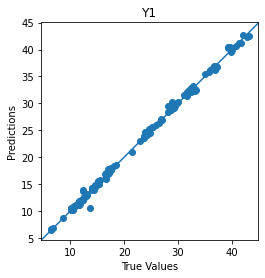

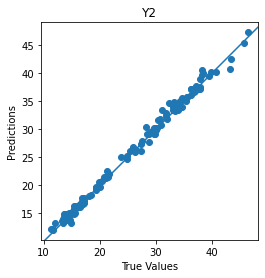

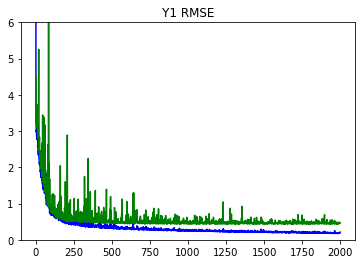

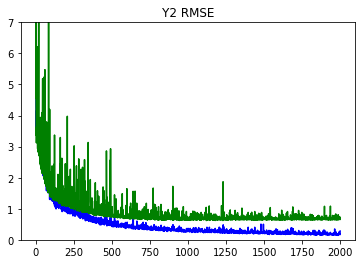

In [18]:
#plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title = 'Y1')
plot_diff(test_Y[1], Y_pred[1], title = 'Y2')
plot_metrics(metric_name = 'y1_output_root_mean_squared_error', title = 'Y1 RMSE', ylim = 6)
plot_metrics(metric_name = 'y2_output_root_mean_squared_error', title = 'Y2 RMSE', ylim = 7)